In [12]:
import numpy as np
import pandas as pd
import math
from scipy.stats import norm
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# –ì—Ä–∞—Ñ–∏–∫–∏ —Ñ—É–Ω–∫—Ü–∏–∏ –≤—ã–ø–ª–∞—Ç

–ü—Ä–∏–º–µ—Ä 1. –ü–æ—Å—Ç—Ä–æ–π—Ç–µ –≥—Ä–∞—Ñ–∏–∫–∏ —Ñ—É–Ω–∫—Ü–∏–∏ –≤—ã–ø–ª–∞—Ç –¥–ª—è –æ–ø—Ü–∏–æ–Ω–æ–≤ –∫–æ–ª–ª (–ø–æ–∫—É–ø–∫–∞, –ø—Ä–æ–¥–∞–∂–∞) –∏ –ø—É—Ç (–ø–æ–∫—É–ø–∫–∞, –ø—Ä–æ–¥–∞–∂–∞).

In [13]:
def payoff_buy_call(S, K):
    return np.maximum(S - K, 0)

def payoff_buy_put(S, K):
    return np.maximum(K - S, 0)

def payoff_sell_call(S, K):
    return -payoff_buy_call(S, K)

def payoff_sell_put(S, K):
    return -payoff_buy_put(S, K)

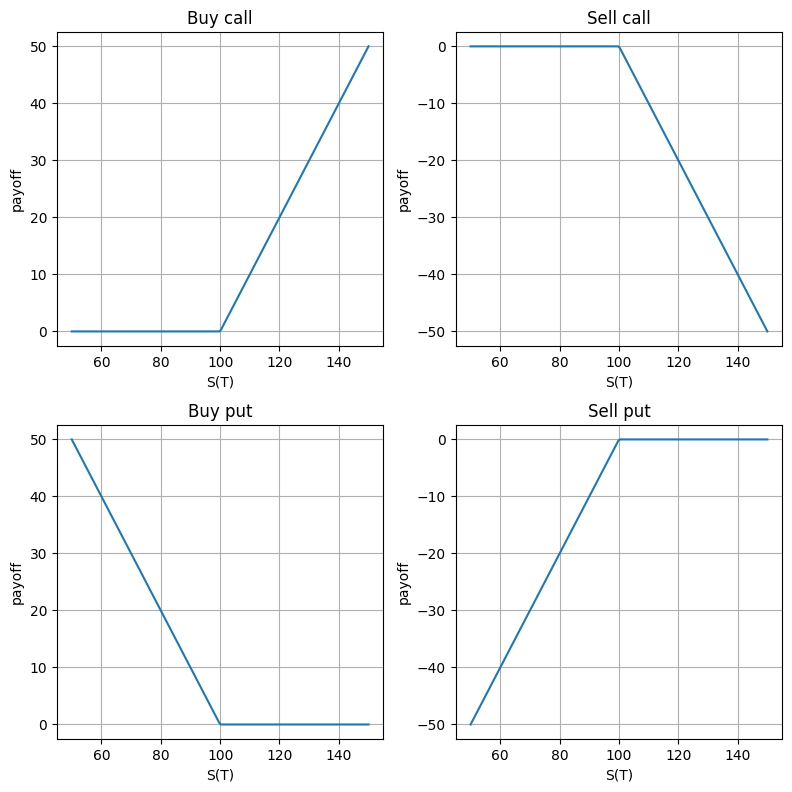

In [14]:
K = 100
S = np.linspace(50, 150, 200)

fig, ax = plt.subplots(2, 2, figsize = (8,8))
ax[0][0].plot(S, payoff_buy_call(S, K))
ax[0][0].set_xlabel("S(T)")
ax[0][0].set_ylabel("payoff")
ax[0][0].grid(True)
ax[0][0].set_title("Buy call")

ax[0][1].plot(S, payoff_sell_call(S, K))
ax[0][1].set_xlabel("S(T)")
ax[0][1].set_ylabel("payoff")
ax[0][1].grid(True)
ax[0][1].set_title("Sell call")

ax[1][0].plot(S, payoff_buy_put(S, K))
ax[1][0].set_xlabel("S(T)")
ax[1][0].set_ylabel("payoff")
ax[1][0].grid(True)
ax[1][0].set_title("Buy put")

ax[1][1].plot(S, payoff_sell_put(S, K))
ax[1][1].set_xlabel("S(T)")
ax[1][1].set_ylabel("payoff")
ax[1][1].grid(True)
ax[1][1].set_title("Sell put")

fig.tight_layout(pad=1.0)

## –ó–∞–¥–∞—á–∞ (Collar)

  –î–æ–ø—É—Å—Ç–∏–º, —á—Ç–æ —Ç–µ–∫—É—â–∞—è —Ü–µ–Ω–∞ –±–∞–∑–æ–≤–æ–≥–æ –∞–∫—Ç–∏–≤–∞ —Ä–∞–≤–Ω–∞ 70.65, —Å—Ç—Ä–∞–π–∫–∏ –æ–ø—Ü–∏–æ–Ω–∞ –ø—É—Ç –∏ –∫–æ–ª–ª —Ä–∞–≤–Ω—ã 65 –∏ 75 —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–µ–Ω–Ω–æ, –∞ –æ—Ü–µ–Ω–∫–∏ –∏—Ö —Å—Ç–æ–∏–º–æ—Å—Ç–∏ (–ø—Ä–µ–º–∏–∏) —Ä–∞–≤–Ω—ã 2 –∏ 3.25 —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–µ–Ω–Ω–æ. –ü–æ—Å—Ç—Ä–æ–π—Ç–µ —Å—Ç—Ä–∞—Ç–µ–≥–∏—é, –∫–æ—Ç–æ—Ä–∞—è –∑–∞–∫–ª—é—á–∞–µ—Ç—Å—è –≤ –ø–æ–∫—É–ø–∫–µ –æ–ø—Ü–∏–æ–Ω–∞ –ø—É—Ç –∏ –ø—Ä–æ–¥–∞–∂–µ –æ–ø—Ü–∏–æ–Ω–∞ –∫–æ–ª–ª.

–û–ø—Ä–µ–¥–µ–ª–∏—Ç–µ –º–∞–∫—Å–∏–º–∞–ª—å–Ω—É—é –ø—Ä–∏–±—ã–ª—å –∏ –ø–æ—Ç–µ—Ä–∏, –µ—Å–ª–∏ —Ü–µ–Ω–∞ –±–∞–∑–æ–≤–æ–≥–æ –∞–∫—Ç–∏–≤–∞ –º–æ–∂–µ—Ç –≤—ã—Ä–∞—Å—Ç–∏ –≤ –¥–≤–∞ —Ä–∞–∑–∞ (–º–µ–Ω—å—à–µ –Ω—É–ª—è –Ω–µ –º–æ–∂–µ—Ç –±—ã—Ç—å). –û–ø—Ä–µ–¥–µ–ª–∏—Ç–µ –∏–Ω—Ç–µ—Ä–≤–∞–ª –±–µ–∑—É–±—ã—Ç–æ—á–Ω–æ—Å—Ç–∏ —Å—Ç—Ä–∞—Ç–µ–≥–∏–∏ —Å —É—á–µ—Ç–æ–º –ø—Ä–µ–º–∏–∏. –ü–æ—Å—Ç—Ä–æ–π—Ç–µ –≥—Ä–∞—Ñ–∏–∫ —Ñ—É–Ω–∫—Ü–∏–∏ –≤—ã–ø–ª–∞—Ç –¥–ª—è –æ–ø—Ü–∏–æ–Ω–Ω–æ–π —Å—Ç—Ä–∞—Ç–µ–≥–∏–∏.

https://blog.quantinsti.com/collar-options-trading-strategy-python/


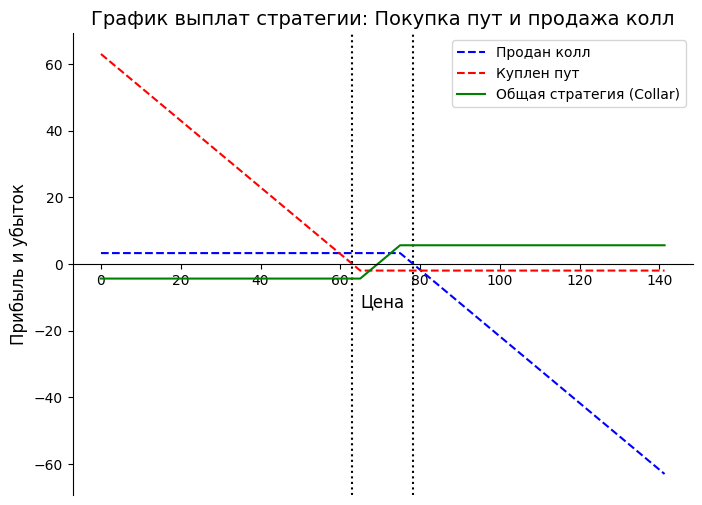

–ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è –ø—Ä–∏–±—ã–ª—å: 66.25
–ú–∞–∫—Å–∏–º–∞–ª—å–Ω—ã–π —É–±—ã—Ç–æ–∫: -65.05000000000001


In [15]:
spot_price = 70.65          
strike_price_long_put = 65    
premium_long_put = 2           
strike_price_short_call = 75   
premium_short_call = 3.25     


sT = np.linspace(0, 2 * spot_price, 1000)


payoff_short_call = payoff_sell_call(sT, strike_price_short_call) + premium_short_call
payoff_long_put = payoff_buy_put(sT, strike_price_long_put) - premium_long_put
payoff_collar = payoff_short_call + payoff_long_put

break_even_lower = strike_price_long_put - premium_long_put
break_even_upper = strike_price_short_call + premium_short_call

fig, ax = plt.subplots(figsize=(8, 6))


ax.spines['top'].set_visible(False)   
ax.spines['right'].set_visible(False)  
ax.spines['bottom'].set_position('zero')  


ax.axvline(break_even_lower, color='black', linestyle=':')
ax.axvline(break_even_upper, color='black', linestyle=':')


ax.plot(sT, payoff_short_call, '--', label='–ü—Ä–æ–¥–∞–Ω –∫–æ–ª–ª', color='blue')
ax.plot(sT, payoff_long_put, '--', label='–ö—É–ø–ª–µ–Ω –ø—É—Ç', color='red')
ax.plot(sT, payoff_collar+sT-spot_price, label='–û–±—â–∞—è —Å—Ç—Ä–∞—Ç–µ–≥–∏—è (Collar)', color='green') 

plt.xlabel('–¶–µ–Ω–∞', fontsize=12)
plt.ylabel('–ü—Ä–∏–±—ã–ª—å –∏ —É–±—ã—Ç–æ–∫', fontsize=12)
plt.title('–ì—Ä–∞—Ñ–∏–∫ –≤—ã–ø–ª–∞—Ç —Å—Ç—Ä–∞—Ç–µ–≥–∏–∏: –ü–æ–∫—É–ø–∫–∞ –ø—É—Ç –∏ –ø—Ä–æ–¥–∞–∂–∞ –∫–æ–ª–ª', fontsize=14)
plt.legend()

plt.show()

print("–ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è –ø—Ä–∏–±—ã–ª—å:", max(payoff_collar))
print("–ú–∞–∫—Å–∏–º–∞–ª—å–Ω—ã–π —É–±—ã—Ç–æ–∫:", min(payoff_collar))


## –ó–∞–¥–∞—á–∞ (Long Straddle)

–î–æ–ø—É—Å—Ç–∏–º, —á—Ç–æ —Ç–µ–∫—É—â–∞—è —Ü–µ–Ω–∞ –±–∞–∑–æ–≤–æ–≥–æ –∞–∫—Ç–∏–≤–∞ —Ä–∞–≤–Ω–∞ 172.5, —Å—Ç—Ä–∞–π–∫–∏ –æ–ø—Ü–∏–æ–Ω–∞ –ø—É—Ç –∏ –∫–æ–ª–ª –æ–¥–Ω–∏–Ω–∞–∫–æ–≤—ã–µ –∏ —Ä–∞–≤–Ω—ã 200, –∞ –ø—Ä–µ–º–∏–∏ –æ–ø—Ü–∏–æ–Ω–æ–≤ —Ä–∞–≤–Ω—ã 29.25 –∏ 0.04 —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–µ–Ω–Ω–æ. –ü–æ—Å—Ç—Ä–æ–π—Ç–µ —Å—Ç—Ä–∞—Ç–µ–≥–∏—é, –∫–æ—Ç–æ—Ä–∞—è –∑–∞–∫–ª—é—á–∞–µ—Ç—Å—è –≤ –ø–æ–∫—É–ø–∫–µ –æ–ø—Ü–∏–æ–Ω–∞ –ø—É—Ç –∏ –ø–æ–∫—É–ø–∫–µ –æ–ø—Ü–∏–æ–Ω–∞ –∫–æ–ª–ª.

–û–ø—Ä–µ–¥–µ–ª–∏—Ç–µ –º–∞–∫—Å–∏–º–∞–ª—å–Ω—É—é –ø—Ä–∏–±—ã–ª—å –∏ –ø–æ—Ç–µ—Ä–∏, –µ—Å–ª–∏ —Ü–µ–Ω–∞ –±–∞–∑–æ–≤–æ–≥–æ –∞–∫—Ç–∏–≤–∞ –º–æ–∂–µ—Ç –≤—ã—Ä–∞—Å—Ç–∏ –≤ –¥–≤–∞ —Ä–∞–∑–∞ (–º–µ–Ω—å—à–µ –Ω—É–ª—è –Ω–µ –º–æ–∂–µ—Ç –±—ã—Ç—å). –û–ø—Ä–µ–¥–µ–ª–∏—Ç–µ –∏–Ω—Ç–µ—Ä–≤–∞–ª –±–µ–∑—É–±—ã—Ç–æ—á–Ω–æ—Å—Ç–∏ —Å—Ç—Ä–∞—Ç–µ–≥–∏–∏ —Å —É—á–µ—Ç–æ–º –ø—Ä–µ–º–∏–∏. –ü–æ—Å—Ç—Ä–æ–π—Ç–µ –≥—Ä–∞—Ñ–∏–∫ —Ñ—É–Ω–∫—Ü–∏–∏ –≤—ã–ø–ª–∞—Ç –¥–ª—è –æ–ø—Ü–∏–æ–Ω–Ω–æ–π —Å—Ç—Ä–∞—Ç–µ–≥–∏–∏.

https://blog.quantinsti.com/straddle-options-trading-strategy-python/

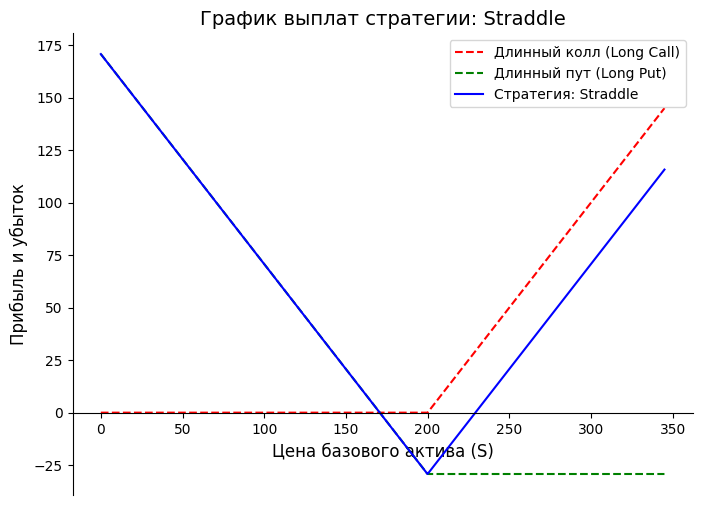

–ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è –ø—Ä–∏–±—ã–ª—å: –ù–µ–æ–≥—Ä–∞–Ω–∏—á–µ–Ω–Ω–∞—è (Unlimited)
–ú–∞–∫—Å–∏–º–∞–ª—å–Ω—ã–π —É–±—ã—Ç–æ–∫: -29.244954954954956


In [16]:
spot_price = 172.5           
strike_price_long_put = 200   
premium_long_put = 29.25      
strike_price_long_call = 200  
premium_long_call = 0.04     


sT = np.linspace(0, 2 * spot_price, 1000)

payoff_long_call = payoff_buy_call(sT, strike_price_long_call) - premium_long_call
payoff_long_put = payoff_buy_put(sT, strike_price_long_put) - premium_long_put

payoff_straddle = payoff_long_call + payoff_long_put

fig, ax = plt.subplots(figsize=(8, 6))

ax.spines['top'].set_visible(False)   
ax.spines['right'].set_visible(False) 
ax.spines['bottom'].set_position('zero')  

ax.plot(sT, payoff_long_call, '--', label='–î–ª–∏–Ω–Ω—ã–π –∫–æ–ª–ª (Long Call)', color='r')
ax.plot(sT, payoff_long_put, '--', label='–î–ª–∏–Ω–Ω—ã–π –ø—É—Ç (Long Put)', color='g')
ax.plot(sT, payoff_straddle, label='–°—Ç—Ä–∞—Ç–µ–≥–∏—è: Straddle', color='b')

plt.xlabel('–¶–µ–Ω–∞ –±–∞–∑–æ–≤–æ–≥–æ –∞–∫—Ç–∏–≤–∞ (S)', fontsize=12)
plt.ylabel('–ü—Ä–∏–±—ã–ª—å –∏ —É–±—ã—Ç–æ–∫', fontsize=12)
plt.title('–ì—Ä–∞—Ñ–∏–∫ –≤—ã–ø–ª–∞—Ç —Å—Ç—Ä–∞—Ç–µ–≥–∏–∏: Straddle', fontsize=14)
plt.legend()
plt.show()


print("–ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è –ø—Ä–∏–±—ã–ª—å: –ù–µ–æ–≥—Ä–∞–Ω–∏—á–µ–Ω–Ω–∞—è (Unlimited)")
print("–ú–∞–∫—Å–∏–º–∞–ª—å–Ω—ã–π —É–±—ã—Ç–æ–∫:", min(payoff_straddle))

# –ë–∏–Ω–æ–º–∏–Ω–∞–ª—å–Ω–∞—è –º–æ–¥–µ–ª—å

In [17]:
# plot_binomial_tree: visualisation of the tree and state prices
def plot_binomial_tree(statePrices):
    for i in range(0,n+1):
        for j in range(0,n+1):
            if j>i:
                break
            if i<n:
                x1, y1 = [i, i+1], [2*j-(i-1),2*j+1-(i-1)]
                plt.plot(x1, y1, marker = 'o',color="red")
                x1, y1 = [i, i+1], [2*j-(i-1),2*j-1-(i-1)]
                plt.plot(x1, y1, marker = 'o',color="black")
            plt.text(i-0.2,2*j-(i-1)-0.6,"%.2f" % statePrices["payoff"][i][j])
            plt.text(i-0.2,2*j-(i-1)-1.0,"%.2f" % statePrices["underlying"][i][j],color="blue")
    plt.title("–ë–∏–Ω–æ–º–∏–Ω–∞–ª—å–Ω–æ–µ –¥–µ—Ä–µ–≤–æ")
    plt.xlabel("p=%.1f%%, u=%.3f, r=%.2f%%, q=%.2f%%, dt=%.2fdays" % (statePrices["p"]*100,
                                                                   statePrices["u"],
                                                                   statePrices["r"]*100,
                                                                   statePrices["q"]*100,
                                                                   statePrices["dt"]*365))
    plt.show()

In [18]:
# binomial_tree_pricer

def binomial_tree_pricer(r, q, sigma, T, n, S, payoff, american=True, showStatePrices=False):
# r: risk neutral rate
# q: dividend yield
# sigma: volatility
# T: maturity in years
# n: number of time steps
# S: spot stock price
# payoff: payoff function e.g.: lambda S: max(S-K,0)
# american: early exercise: True if american, otherwise European
# showStatePrices: print tree probabilities and state prices

    dt = T/n
    up  = np.exp(sigma*np.sqrt(dt))
    p0 = (up * np.exp((r-q) * dt) - 1) / (up**2 - 1)
    p1 = 1 - p0
    df = np.exp(-r * dt)
    # initial values at time T
    statePrices = {"p":p0, "u":up, "r":r, "q":q, "dt":dt}
    if showStatePrices:
        statePrices["payoff"]=np.zeros((n+1,n+1))
        statePrices["underlying"]=np.zeros((n+1,n+1))
    p = np.zeros(n+1)
    for i in range(n+1): # i from 0 to n incl
        p[i] = payoff(S * up**(2*i - n))
        if showStatePrices:
            statePrices["payoff"][n][i] = p[i]
            statePrices["underlying"][n][i] = S * up**(2*i - n)
    # move to earlier times
    for j in range(n-1,-1,-1): # j from n-1 to 0 incl
        for i in range(j+1): # i from 0 to j incl
            # discounted expected value of exdiv price
            p[i] = (p0 * p[i+1] + p1 * p[i])*df
            # american payoff
            if american:
                early_exercise = payoff(S * up**(2*i - j))
                p[i] = max(early_exercise,p[i])
            if showStatePrices:
                statePrices["payoff"][j][i] = p[i]
                statePrices["underlying"][j][i] = S * up**(2*i - j)
    if showStatePrices:
        plot_binomial_tree(statePrices)
    return p[0]

–ü—Ä–∏–º–µ—Ä. –¢–µ–∫—É—â–∞—è —Ü–µ–Ω–∞ –∞–∫—Ü–∏–π —Ä–∞–≤–Ω–∞ 50, –≤–æ–ª–∞—Ç–∏–ª—å–Ω–æ—Å—Ç—å 15%, —Ü–µ–Ω–∞ —Å—Ç—Ä–∞–π–∫ –Ω–∞ 1% –≤—ã—à–µ —Ü–µ–Ω—ã –±–∞–∑–æ–≤–æ–≥–æ –∞–∫—Ç–∏–≤–∞, –≤—Ä–µ–º—è –¥–æ —ç–∫—Å–ø–∏—Ä–∞—Ü–∏–∏ 1 –º–µ—Å—è—Ü, –±–µ–∑—Ä–∏—Å–∫–æ–≤–∞—è —Å—Ç–∞–≤–∫–∞ 5%, –Ω–∞ –∞–∫—Ü–∏–∏ –Ω–∞—á–∏—Å–ª—è—é—Ç—Å—è –¥–∏–≤–∏–¥–µ–Ω–¥—ã 2%. –ü–æ—Å—Ç—Ä–æ–π—Ç–µ –±–∏–Ω–æ–º–∏–Ω–∞–ª—å–Ω–æ–µ –¥–µ—Ä–µ–≤–æ –Ω–∞ 5 –ø–µ—Ä–∏–æ–¥–æ–≤ –¥–ª—è –µ–≤—Ä–æ–ø–µ–π—Å–∫–æ–≥–æ –æ–ø—Ü–∏–æ–Ω–∞ –ø—É—Ç –∏ –æ—Ü–µ–Ω–∏—Ç–µ –µ–≥–æ —Å—Ç–æ–∏–º–æ—Å—Ç—å.

–ë–∏–Ω–æ–º–∏–Ω–∞–ª—å–Ω–æ–µ –¥–µ—Ä–µ–≤–æ, –µ–≤—Ä–æ–ø–µ–π—Å–∫–∏–π –æ–ø—Ü–∏–æ–Ω –ø—É—Ç, —Ñ—É–Ω–∫—Ü–∏—è –≤—ã–ø–ª–∞—Ç max(K-S, 0)


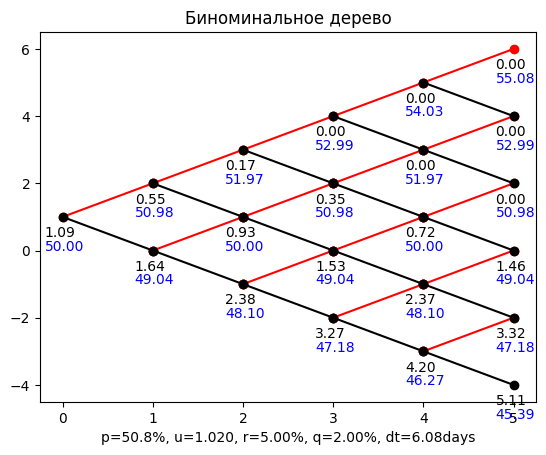

1.0853174417962133

In [19]:
r, q, sigma, T, n, S = 0.05, 0.02, 0.15, 1/12, 5, 50
K = S*1.01
print("–ë–∏–Ω–æ–º–∏–Ω–∞–ª—å–Ω–æ–µ –¥–µ—Ä–µ–≤–æ, –µ–≤—Ä–æ–ø–µ–π—Å–∫–∏–π –æ–ø—Ü–∏–æ–Ω –ø—É—Ç, —Ñ—É–Ω–∫—Ü–∏—è –≤—ã–ø–ª–∞—Ç max(K-S, 0)")
binomial_tree_pricer(r, q, sigma, T, n, S, lambda S: max(K-S,0), american=False, showStatePrices=True)

## –ó–∞–¥–∞—á–∞ (–¥–µ—Ä–µ–≤–æ)

–ó–∞–¥–∞—á–∞. –ü–æ—Å—Ç—Ä–æ–π—Ç–µ –±–∏–Ω–æ–º–∏–Ω–∞–ª—å–Ω—ã–µ –¥–µ—Ä–µ–≤—å—è –¥–ª—è
*   –∞–º–µ—Ä–∏–∫–∞–Ω—Å–∫–æ–≥–æ –æ–ø—Ü–∏–æ–Ω–∞ –∫–æ–ª–ª,
*   –∞–º–µ—Ä–∏–∫–∞–Ω—Å–∫–æ–≥–æ –æ–ø—Ü–∏–æ–Ω–∞ –ø—É—Ç,
*   –µ–≤—Ä–æ–ø–µ–π—Å–∫–æ–≥–æ –æ–ø—Ü–∏–æ–Ω–∞ –∫–æ–ª–ª,
*   –µ–≤—Ä–æ–ø–µ–π—Å–∫–æ–≥–æ –æ–ø—Ü–∏–æ–Ω–∞ –ø—É—Ç
–∏ —Å–¥–µ–ª–∞–π—Ç–µ –≤—ã–≤–æ–¥—ã.





–ë–∏–Ω–æ–º–∏–Ω–∞–ª—å–Ω–æ–µ –¥–µ—Ä–µ–≤–æ, –∞–º–µ—Ä–∏–∫–∞–Ω—Å–∫–∏–π –æ–ø—Ü–∏–æ–Ω –∫–æ–ª–ª


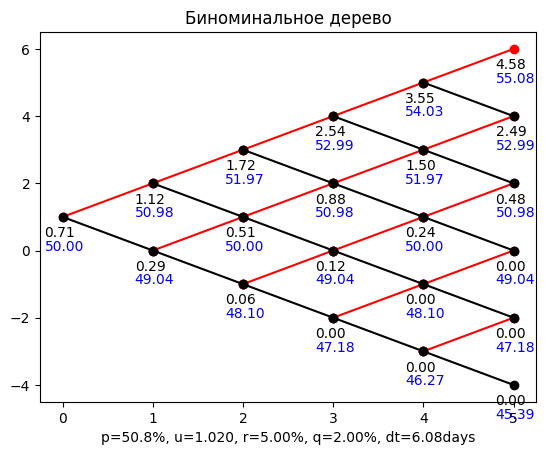

–¶–µ–Ω–∞ –∞–º–µ—Ä–∏–∫–∞–Ω—Å–∫–æ–≥–æ –æ–ø—Ü–∏–æ–Ω–∞ –∫–æ–ª–ª: 0.7120324211650718
–ë–∏–Ω–æ–º–∏–Ω–∞–ª—å–Ω–æ–µ –¥–µ—Ä–µ–≤–æ, –∞–º–µ—Ä–∏–∫–∞–Ω—Å–∫–∏–π –æ–ø—Ü–∏–æ–Ω –ø—É—Ç


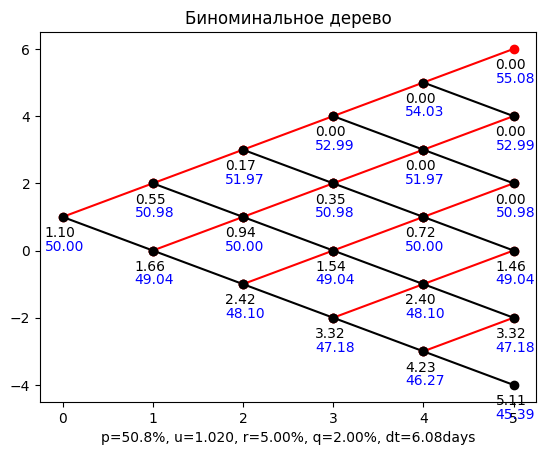

–¶–µ–Ω–∞ –∞–º–µ—Ä–∏–∫–∞–Ω—Å–∫–æ–≥–æ –æ–ø—Ü–∏–æ–Ω–∞ –ø—É—Ç: 1.0962783164249443
–ë–∏–Ω–æ–º–∏–Ω–∞–ª—å–Ω–æ–µ –¥–µ—Ä–µ–≤–æ, –µ–≤—Ä–æ–ø–µ–π—Å–∫–∏–π –æ–ø—Ü–∏–æ–Ω –∫–æ–ª–ª


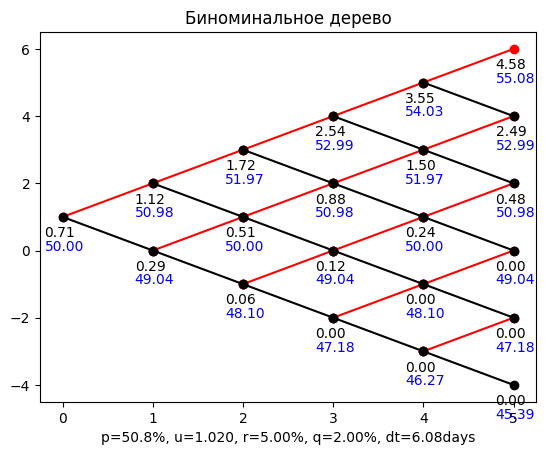

–¶–µ–Ω–∞ –µ–≤—Ä–æ–ø–µ–π—Å–∫–æ–≥–æ –æ–ø—Ü–∏–æ–Ω–∞ –∫–æ–ª–ª: 0.7120324211650718
–ë–∏–Ω–æ–º–∏–Ω–∞–ª—å–Ω–æ–µ –¥–µ—Ä–µ–≤–æ, –µ–≤—Ä–æ–ø–µ–π—Å–∫–∏–π –æ–ø—Ü–∏–æ–Ω –ø—É—Ç


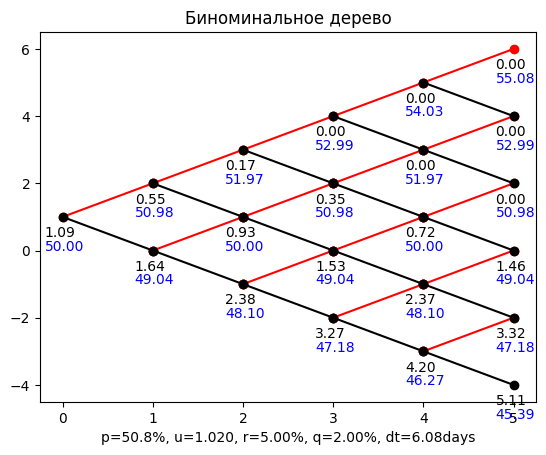

–¶–µ–Ω–∞ –µ–≤—Ä–æ–ø–µ–π—Å–∫–æ–≥–æ –æ–ø—Ü–∏–æ–Ω–∞ –ø—É—Ç: 1.0853174417962133


In [20]:

r, q, sigma, T, n, S = 0.05, 0.02, 0.15, 1 / 12, 5, 50
K = S * 1.01  


print("–ë–∏–Ω–æ–º–∏–Ω–∞–ª—å–Ω–æ–µ –¥–µ—Ä–µ–≤–æ, –∞–º–µ—Ä–∏–∫–∞–Ω—Å–∫–∏–π –æ–ø—Ü–∏–æ–Ω –∫–æ–ª–ª")
price_american_call = binomial_tree_pricer(r, q, sigma, T, n, S, lambda S: max(S - K, 0), american=True, showStatePrices=True)
print("–¶–µ–Ω–∞ –∞–º–µ—Ä–∏–∫–∞–Ω—Å–∫–æ–≥–æ –æ–ø—Ü–∏–æ–Ω–∞ –∫–æ–ª–ª:", price_american_call)

print("=======================================================================================================================")

print("–ë–∏–Ω–æ–º–∏–Ω–∞–ª—å–Ω–æ–µ –¥–µ—Ä–µ–≤–æ, –∞–º–µ—Ä–∏–∫–∞–Ω—Å–∫–∏–π –æ–ø—Ü–∏–æ–Ω –ø—É—Ç")
price_american_put = binomial_tree_pricer(r, q, sigma, T, n, S, lambda S: max(K - S, 0), american=True, showStatePrices=True)
print("–¶–µ–Ω–∞ –∞–º–µ—Ä–∏–∫–∞–Ω—Å–∫–æ–≥–æ –æ–ø—Ü–∏–æ–Ω–∞ –ø—É—Ç:", price_american_put)

print("=======================================================================================================================")

print("–ë–∏–Ω–æ–º–∏–Ω–∞–ª—å–Ω–æ–µ –¥–µ—Ä–µ–≤–æ, –µ–≤—Ä–æ–ø–µ–π—Å–∫–∏–π –æ–ø—Ü–∏–æ–Ω –∫–æ–ª–ª")
price_european_call = binomial_tree_pricer(r, q, sigma, T, n, S, lambda S: max(S - K, 0), american=False, showStatePrices=True)
print("–¶–µ–Ω–∞ –µ–≤—Ä–æ–ø–µ–π—Å–∫–æ–≥–æ –æ–ø—Ü–∏–æ–Ω–∞ –∫–æ–ª–ª:", price_european_call)

print("=======================================================================================================================")

print("–ë–∏–Ω–æ–º–∏–Ω–∞–ª—å–Ω–æ–µ –¥–µ—Ä–µ–≤–æ, –µ–≤—Ä–æ–ø–µ–π—Å–∫–∏–π –æ–ø—Ü–∏–æ–Ω –ø—É—Ç")
price_european_put = binomial_tree_pricer(r, q, sigma, T, n, S, lambda S: max(K - S, 0), american=False, showStatePrices=True)
print("–¶–µ–Ω–∞ –µ–≤—Ä–æ–ø–µ–π—Å–∫–æ–≥–æ –æ–ø—Ü–∏–æ–Ω–∞ –ø—É—Ç:", price_european_put)


* –ê–º–µ—Ä–∏–∫–∞–Ω—Å–∫–∏–π –æ–ø—Ü–∏–æ–Ω –∫–æ–ª–ª:

    - –¶–µ–Ω–∞ –æ–ø—Ü–∏–æ–Ω–∞ ($0.71) –≤–∫–ª—é—á–∞–µ—Ç –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å –¥–æ—Å—Ä–æ—á–Ω–æ–≥–æ –∏—Å–ø–æ–ª–Ω–µ–Ω–∏—è, –Ω–æ –¥–æ—Å—Ä–æ—á–Ω–æ–µ –∏—Å–ø–æ–ª–Ω–µ–Ω–∏–µ –∑–¥–µ—Å—å –Ω–µ–≤—ã–≥–æ–¥–Ω–æ –∏–∑-–∑–∞ –æ—Ç—Å—É—Ç—Å—Ç–≤–∏—è –¥–∏–≤–∏–¥–µ–Ω–¥–æ–≤ –∏ –æ–∂–∏–¥–∞–µ–º–æ–≥–æ —Ä–æ—Å—Ç–∞ –∞–∫—Ç–∏–≤–∞.
* –ê–º–µ—Ä–∏–∫–∞–Ω—Å–∫–∏–π –æ–ø—Ü–∏–æ–Ω –ø—É—Ç:

    - –¶–µ–Ω–∞ –æ–ø—Ü–∏–æ–Ω–∞ ($1.10) –≤—ã—à–µ, —á–µ–º —É –µ–≤—Ä–æ–ø–µ–π—Å–∫–æ–≥–æ –ø—É—Ç–∞, —Ç–∞–∫ –∫–∞–∫ –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å –¥–æ—Å—Ä–æ—á–Ω–æ–≥–æ –∏—Å–ø–æ–ª–Ω–µ–Ω–∏—è –ø—É—Ç –æ–ø—Ü–∏–æ–Ω–∞ –∏–º–µ–µ—Ç –±–æ–ª—å—à—É—é —Ü–µ–Ω–Ω–æ—Å—Ç—å –≤ —É—Å–ª–æ–≤–∏—è—Ö —Å–Ω–∏–∂–µ–Ω–∏—è —Ü–µ–Ω—ã –±–∞–∑–æ–≤–æ–≥–æ –∞–∫—Ç–∏–≤–∞.
* –ï–≤—Ä–æ–ø–µ–π—Å–∫–∏–π –æ–ø—Ü–∏–æ–Ω –∫–æ–ª–ª:

    - –¶–µ–Ω–∞ ($0.71) —Å–æ–≤–ø–∞–¥–∞–µ—Ç —Å –∞–º–µ—Ä–∏–∫–∞–Ω—Å–∫–∏–º –∫–æ–ª–ª–æ–º, —Ç–∞–∫ –∫–∞–∫ –¥–æ—Å—Ä–æ—á–Ω–æ–µ –∏—Å–ø–æ–ª–Ω–µ–Ω–∏–µ –µ–≤—Ä–æ–ø–µ–π—Å–∫–æ–≥–æ –∫–æ–ª–ª –æ–ø—Ü–∏–æ–Ω–∞ –Ω–µ–≤–æ–∑–º–æ–∂–Ω–æ, –∞ –æ—Ç—Å—É—Ç—Å—Ç–≤–∏–µ –¥–∏–≤–∏–¥–µ–Ω–¥–æ–≤ –¥–µ–ª–∞–µ—Ç –¥–æ—Å—Ä–æ—á–Ω–æ–µ –∏—Å–ø–æ–ª–Ω–µ–Ω–∏–µ –Ω–µ–Ω—É–∂–Ω—ã–º –¥–ª—è –∞–º–µ—Ä–∏–∫–∞–Ω—Å–∫–æ–≥–æ –æ–ø—Ü–∏–æ–Ω–∞.
* –ï–≤—Ä–æ–ø–µ–π—Å–∫–∏–π –æ–ø—Ü–∏–æ–Ω –ø—É—Ç:

    - –¶–µ–Ω–∞ ($1.08) –Ω–∏–∂–µ, —á–µ–º —É –∞–º–µ—Ä–∏–∫–∞–Ω—Å–∫–æ–≥–æ –ø—É—Ç–∞, —Ç–∞–∫ –∫–∞–∫ –µ–≤—Ä–æ–ø–µ–π—Å–∫–∏–π –æ–ø—Ü–∏–æ–Ω –Ω–µ –º–æ–∂–µ—Ç –±—ã—Ç—å –∏—Å–ø–æ–ª–Ω–µ–Ω –¥–æ—Å—Ä–æ—á–Ω–æ, —á—Ç–æ —Å–Ω–∏–∂–∞–µ—Ç –µ–≥–æ —Ü–µ–Ω–Ω–æ—Å—Ç—å –ø—Ä–∏ –ø–∞–¥–µ–Ω–∏–∏ —Ü–µ–Ω—ã –±–∞–∑–æ–≤–æ–≥–æ –∞–∫—Ç–∏–≤–∞.

# –ú–æ–¥–µ–ª—å –ë–ª–µ–∫–∞-–®–æ—É–ª–∑–∞

–ó–∞–¥–∞—á–∞. –î–æ–ø—É—Å—Ç–∏–º, —á—Ç–æ —É—Å–ª–æ–≤–∏—è –º–æ–¥–µ–ª–∏ –ë–ª–µ–∫–∞-–®–æ—É–ª–∑–∞ –≤—ã–ø–æ–ª–Ω–µ–Ω—ã. –¢–µ–∫—É—â–∞—è —Ü–µ–Ω–∞ –±–µ–∑–¥–∏–≤–∏–¥–µ–Ω—Ç–Ω—ã—Ö –∞–∫—Ü–∏–π —Ä–∞–≤–Ω–∞ 100, –≤–æ–ª–∞—Ç–∞–ª—å–Ω–æ—Å—Ç—å
5%, —Ü–µ–Ω–∞ —Å—Ç—Ä–∞–π–∫ 100, –≤—Ä–µ–º—è –¥–æ —ç–∫—Å–ø–∏—Ä–∞—Ü–∏–∏ –æ–¥–∏–Ω –≥–æ–¥, –±–µ–∑—Ä–∏—Å–∫–æ–≤–∞—è
—Å—Ç–∞–≤–∫–∞ 5%.

–û—Ü–µ–Ω–∏—Ç–µ —Å–ø—Ä–∞–≤–µ–¥–ª–∏–≤—É—é —Å—Ç–æ–∏–º–æ—Å—Ç—å –æ–ø—Ü–∏–æ–Ω–æ–≤ –∫–æ–ª–ª –∏ –ø—É—Ç –∏ –≤—ã—á–∏—Å–ª–∏—Ç–µ –≥—Ä–µ—á–µ—Å–∫–∏–µ —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫–∏ –¥–ª—è –æ–ø—Ü–∏–æ–Ω–æ–≤ –∫–∞–∫ —Ñ—É–Ω–∫—Ü–∏—é –æ—Ç —Ç–µ–∫—É—â–µ–π —Ü–µ–Ω—ã –±–∞–∑–æ–≤–æ–≥–æ –∞–∫—Ç–∏–≤–∞.

In [21]:
r = 0.07
T = 1
K = 100
S0 = 100
sigma = 0.3
t = 0
q = 0
tau = T - t

## –ó–∞–¥–∞—á–∞ (–æ—Ü–µ–Ω–∫–∞ –∏ –ø–∞—Ä–∏—Ç–µ—Ç)

In [22]:
d1 = (np.log(S / K) + (r - q + sigma**2 / 2) * T) / (sigma * np.sqrt(T))

d2 = d1 - sigma * np.sqrt(T)

def call(S, K, T, r, q, d1, d2):
    return S * np.exp(-q * T) * norm.cdf(d1) - K * np.exp (-r * T) * norm.cdf(d2)


def put(S, K, T, r, q, d1, d2):
    return K * np.exp(-r * T) * norm.cdf(-d2) - S * np.exp(-q * T) * norm.cdf(-d1)

In [23]:
# –æ—Ü–µ–Ω–∫–∞ –æ–ø—Ü–∏–æ–Ω–∞ –ø—É—Ç —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º –ø–∞—Ä–∏—Ç–µ—Ç–∞
def put_paritet(S, K, T, r, q):
    return call(S, K, T, r, q, d1, d2) + K * np.exp(-r * T) - S

–°—Ä–∞–≤–Ω–∏—Ç–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –æ—Ü–µ–Ω–∫–∏ –æ–ø—Ü–∏–æ–Ω–∞ –ø—É—Ç —Å/–±–µ–∑ –ø–∞—Ä–∏—Ç–µ—Ç–∞ —Ü–µ–Ω

In [24]:
put_direct = put(S, K, T, r, q, d1, d2)
put_via_parity = put_paritet(S, K, T, r, q)

print(f"–¶–µ–Ω–∞ –æ–ø—Ü–∏–æ–Ω–∞ –ø—É—Ç (–ø—Ä—è–º–æ–π —Ä–∞—Å—á–µ—Ç): {put_direct:.4f}")
print(f"–¶–µ–Ω–∞ –æ–ø—Ü–∏–æ–Ω–∞ –ø—É—Ç (—á–µ—Ä–µ–∑ –ø–∞—Ä–∏—Ç–µ—Ç): {put_via_parity:.4f}")

–¶–µ–Ω–∞ –æ–ø—Ü–∏–æ–Ω–∞ –ø—É—Ç (–ø—Ä—è–º–æ–π —Ä–∞—Å—á–µ—Ç): 43.3792
–¶–µ–Ω–∞ –æ–ø—Ü–∏–æ–Ω–∞ –ø—É—Ç (—á–µ—Ä–µ–∑ –ø–∞—Ä–∏—Ç–µ—Ç): 43.3792


In [25]:
params = f"r = {r}, sigma = {sigma}, t = {t}, T = {T}, S0 = {S0}, K = {K}"
print('–ü–∞—Ä–∞–º–µ—Ç—Ä—ã:', params)

call_price = call(S0, K, T, r, q, d1,d2)
print('–û—Ü–µ–Ω–∫–∞ –æ–ø—Ü–∏–æ–Ω–∞ –∫–æ–ª–ª =', call_price)
put_price  =  put(S0, K, T, r, q,d1,d2)
print('–û—Ü–µ–Ω–∫–∞ –æ–ø—Ü–∏–æ–Ω–∞ –ø—É—Ç =', put_price)

–ü–∞—Ä–∞–º–µ—Ç—Ä—ã: r = 0.07, sigma = 0.3, t = 0, T = 1, S0 = 100, K = 100
–û—Ü–µ–Ω–∫–∞ –æ–ø—Ü–∏–æ–Ω–∞ –∫–æ–ª–ª = 1.4888377112974107
–û—Ü–µ–Ω–∫–∞ –æ–ø—Ü–∏–æ–Ω–∞ –ø—É—Ç = -5.271780298107757


## –ó–∞–¥–∞—á–∞ (–≥—Ä–µ—á–µ—Å–∫–∏–µ —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫–∏)

–í—Å–ø–æ–º–æ–≥–∞—Ç–µ–ª—å–Ω—ã–µ —Ñ—É–Ω–∫—Ü–∏–∏ –¥–ª—è –∞–Ω–∞–ª–∏—Ç–∏—á–µ—Å–∫–æ–≥–æ –≤—ã—á–∏—Å–ª–µ–Ω–∏—è –≥—Ä–µ—á–µ—Å–∫–∏—Ö —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫.

In [49]:
def delta(S, K, r, T, sigma, option_type):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    if option_type == 'call':
        return norm.cdf(d1)
    elif option_type == 'put':
        return -norm.cdf(-d1)

def gamma(S, K, r, T, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    return norm.pdf(d1) / (S * sigma * np.sqrt(T))

def theta(S, K, r, T, sigma, option_type):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    if option_type == 'call':
        return -(S * norm.pdf(d1) * sigma) / (2 * np.sqrt(T)) - r * K * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == 'put':
        return -(S * norm.pdf(d1) * sigma) / (2 * np.sqrt(T)) + r * K * np.exp(-r * T) * norm.cdf(-d2)

def kappa(S, K, r, T, sigma, option_type):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    if option_type == 'call':
        return -np.exp(-r*T)*norm.cdf(d2) 
    elif option_type == 'put':
        return np.exp(-r * T) * norm.cdf(-d2)

def vega(S, K, r, T, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    return S * norm.pdf(d1) * np.sqrt(T)

def rho(S, K, r, T, sigma, option_type):
    d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    if option_type == 'call':
        return K * T * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == 'put':
        return -K * T * np.exp(-r * T) * norm.cdf(-d2)

In [58]:
def plot_greeks(K=100, r=0.07, T=1, sigma=0.2, N=1000, option_type='call'):

    greeks = {
        'Delta': lambda S: delta(S, K, r, T, sigma, option_type),
        'Gamma': lambda S: gamma(S, K, r, T, sigma),
        'Theta': lambda S: theta(S, K, r, T, sigma, option_type),
        'Kappa': lambda S: kappa(S, K, r, T, sigma, option_type),
        'Vega': lambda S: vega(S, K, r, T, sigma),
        'Rho': lambda S: rho(S, K, r, T, sigma, option_type)
    }
    
    color = 'red' if option_type == 'call' else 'black'
    S_values = np.linspace(50, 150, N)
    
   
    fig, axs = plt.subplots(2, 3, figsize=(16, 10), constrained_layout=True)
    
    for ax, (name, func) in zip(axs.flat, greeks.items()):
        
        values = [func(S) for S in S_values]
        
        # –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–∞
        ax.plot(S_values, values, label=name, color=color )
        ax.set_title(name, fontsize=14, fontweight='bold')
        ax.set_xlabel("–¶–µ–Ω–∞ –±–∞–∑–æ–≤–æ–≥–æ –∞–∫—Ç–∏–≤–∞ (S)", fontsize=12)
        ax.set_ylabel(f"{name} –∑–Ω–∞—á–µ–Ω–∏–µ", fontsize=12)
        ax.legend(fontsize=10)
    
    
    fig.suptitle(f"–ì—Ä–∞—Ñ–∏–∫–∏ –≥—Ä–µ—á–µ—Å–∫–∏—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ ({option_type.capitalize()} Option)", fontsize=16, fontweight='bold')
    plt.show()

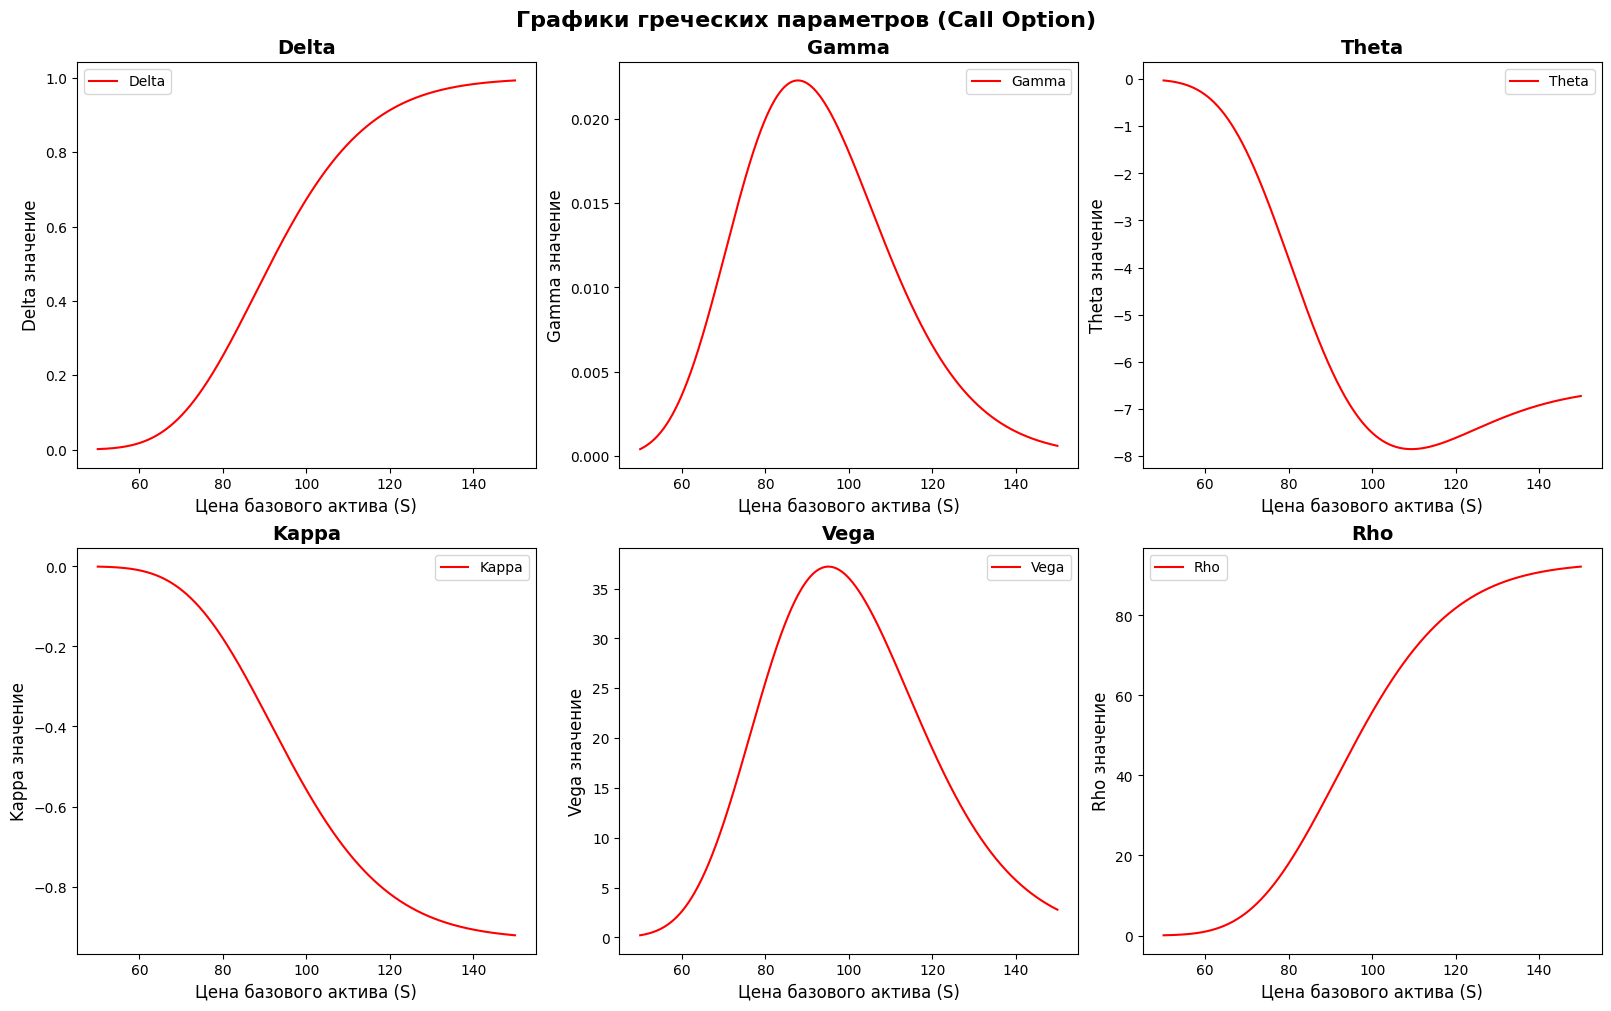

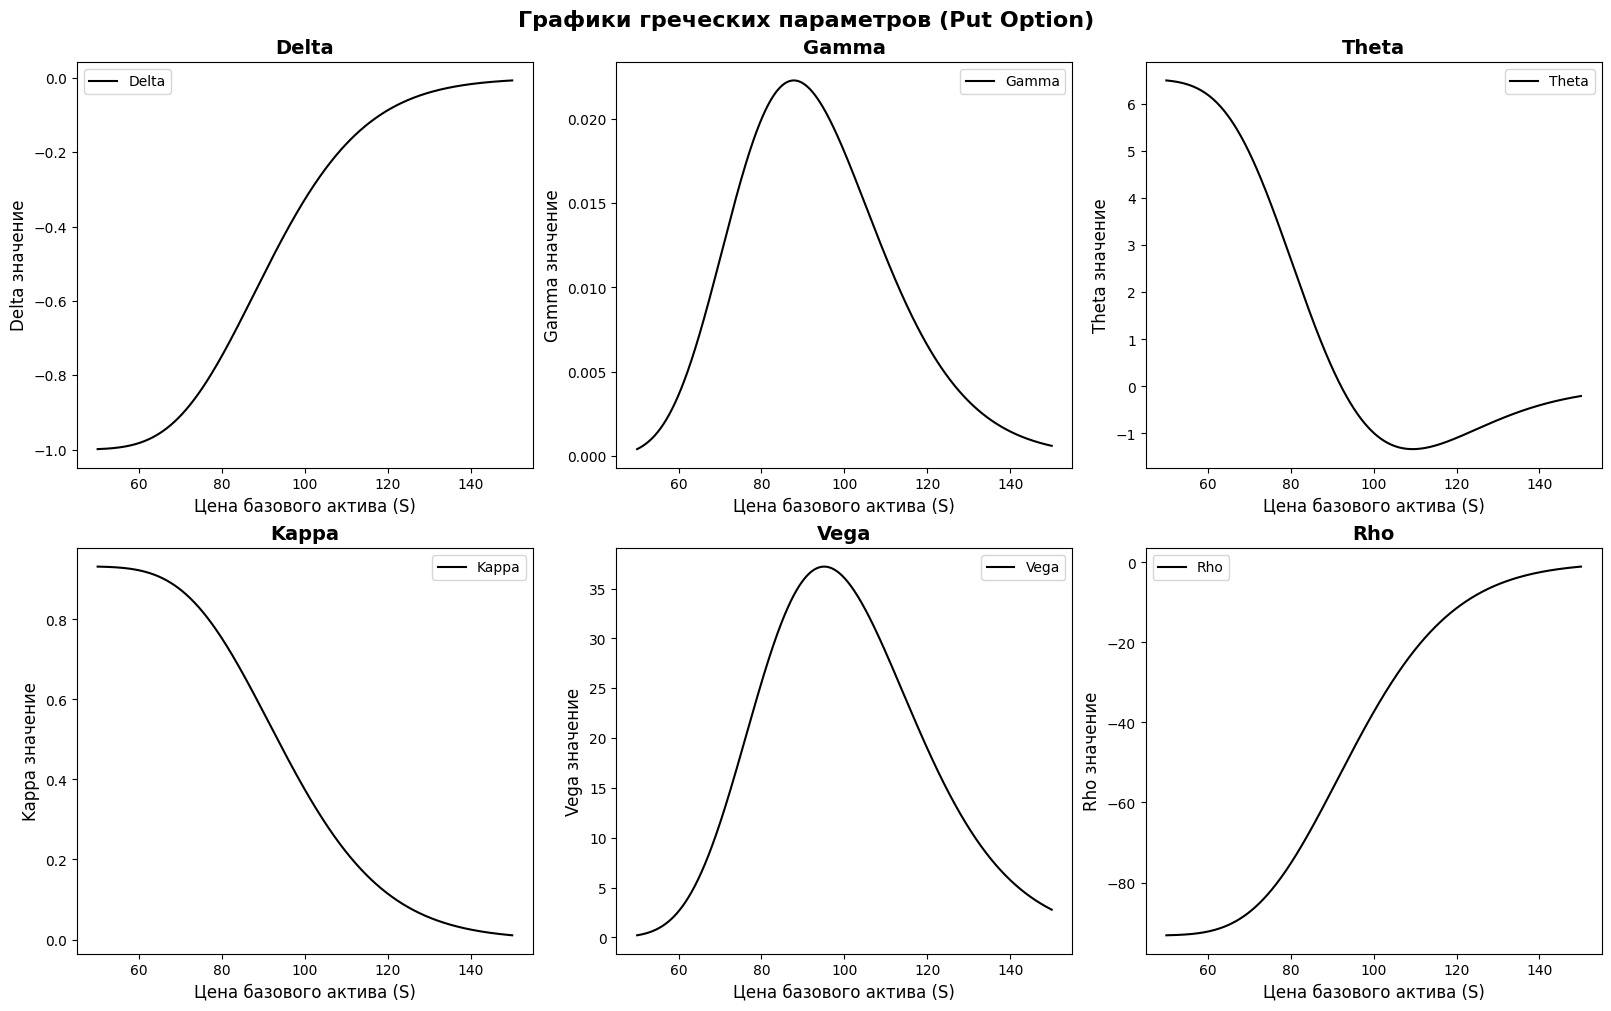

In [59]:
plot_greeks(K=100, r=0.07, T=1, sigma=0.2, N=1000, option_type='call')


plot_greeks(K=100, r=0.07, T=1, sigma=0.2, N=1000, option_type='put')

–ì—Ä–∞—Ñ–∏–∫–∏ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –≥—Ä–µ—á–µ—Å–∫–∏—Ö —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫ –¥–ª—è –æ–ø—Ü–∏–æ–Ω–æ–≤ –æ—Ç —Ü–µ–Ω—ã –±–∞–∑–æ–≤–æ–≥–æ –∞–∫—Ç–∏–≤–∞.

–ó–∞–¥–∞—á–∞. –í—ã—á–∏—Å–ª–∏—Ç–µ –≥—Ä–µ—á–µ—Å–∫–∏–µ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã —á–∏—Å–ª–µ–Ω–Ω–æ –∏ —Å—Ä–∞–≤–Ω–∏—Ç–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã.


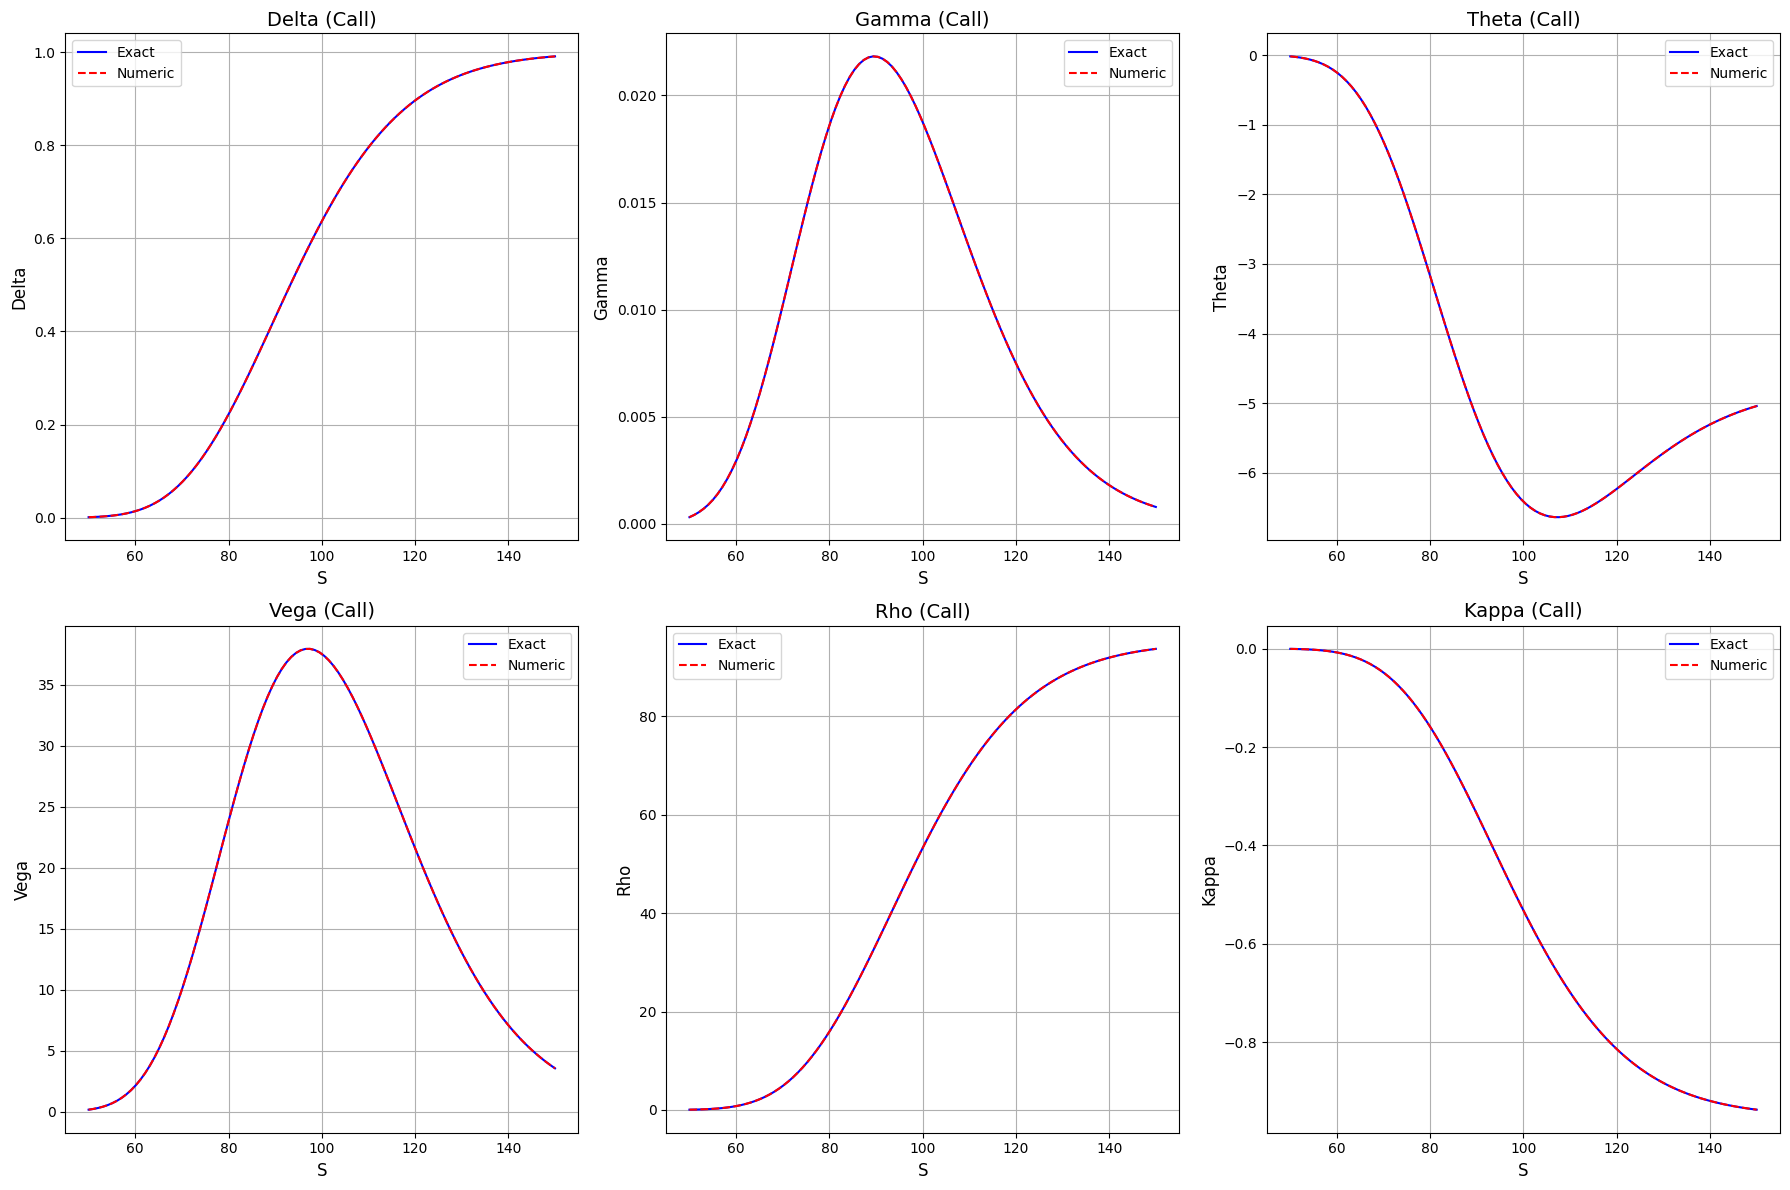

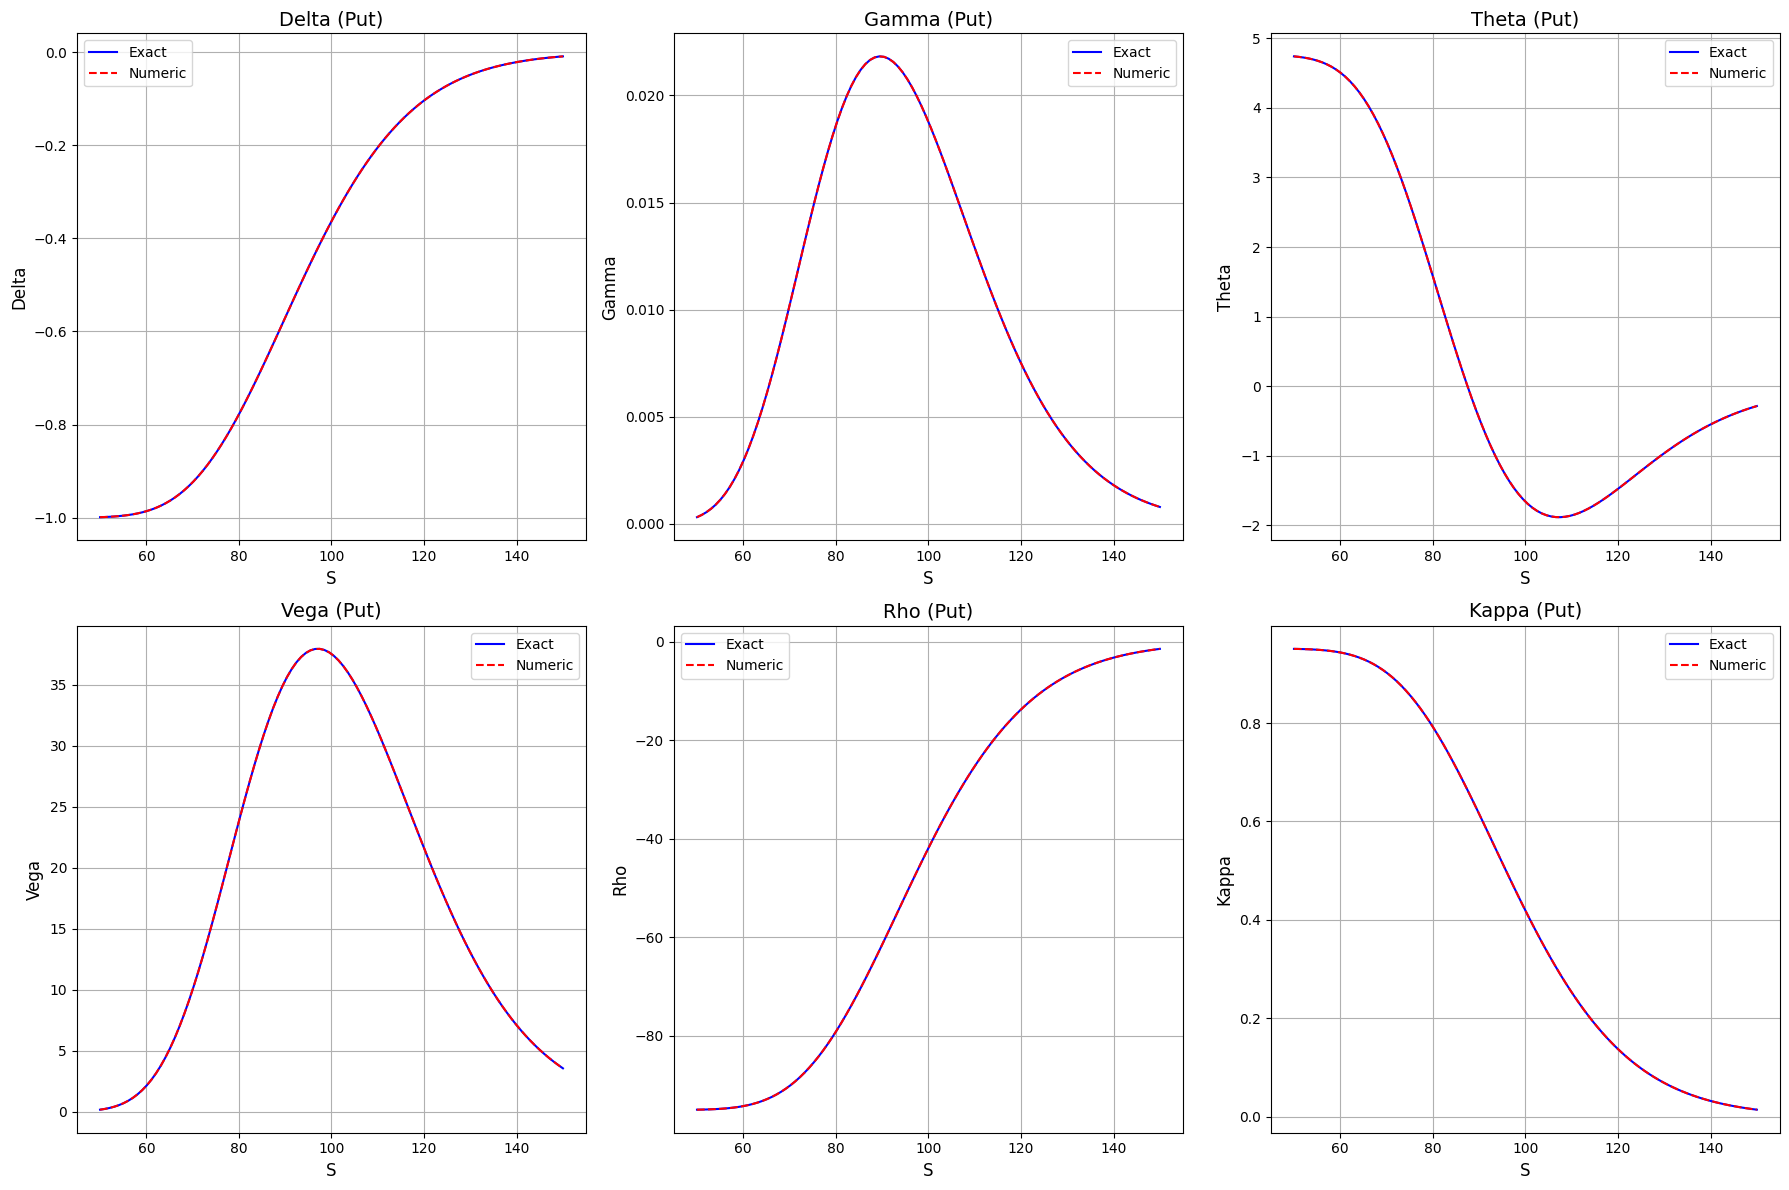

In [ ]:

def option_price(S, K, r, T, sigma, option_type):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    if option_type == 'call':
        return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == 'put':
        return K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)


def numerical_delta(S, K, r, T, sigma, option_type, h=0.001):
    return (option_price(S + h, K, r, T, sigma, option_type) - 
            option_price(S - h, K, r, T, sigma, option_type)) / (2 * h)

def numerical_gamma(S, K, r, T, sigma, option_type, h=0.001):
    return (option_price(S + h, K, r, T, sigma, option_type) - 
            2 * option_price(S, K, r, T, sigma, option_type) + 
            option_price(S - h, K, r, T, sigma, option_type)) / (h ** 2)

def numerical_vega(S, K, r, T, sigma, option_type, h=0.001):
    return (option_price(S, K, r, T, sigma + h, option_type) - 
            option_price(S, K, r, T, sigma - h, option_type)) / (2 * h)

def numerical_theta(S, K, r, T, sigma, option_type, h=0.001):
    return (option_price(S, K, r, T - h, sigma, option_type) - 
            option_price(S, K, r, T + h, sigma, option_type)) / (2 * h)

def numerical_rho(S, K, r, T, sigma, option_type, h=0.001):
    return (option_price(S, K, r + h, T, sigma, option_type) - 
            option_price(S, K, r - h, T, sigma, option_type)) / (2 * h)

def numerical_kappa(S, K, r, T, sigma, option_type, h=0.001):
    return (option_price(S, K + h, r, T, sigma, option_type) - 
            option_price(S, K - h, r, T, sigma, option_type)) / (2 * h)


def plot_greeks(S_range, K, r, T, sigma, option_type):
    S_values = np.linspace(*S_range, 100)
    greeks = {
        'Delta': lambda S: numerical_delta(S, K, r, T, sigma, option_type),
        'Gamma': lambda S: numerical_gamma(S, K, r, T, sigma, option_type),
        'Theta': lambda S: numerical_theta(S, K, r, T, sigma, option_type),
        'Vega': lambda S: numerical_vega(S, K, r, T, sigma, option_type),
        'Rho': lambda S: numerical_rho(S, K, r, T, sigma, option_type),
        'Kappa': lambda S: numerical_kappa(S, K, r, T, sigma, option_type),
    }
    fig, axs = plt.subplots(2, 3, figsize=(18, 12))
    for ax, (name, func) in zip(axs.flat, greeks.items()):
        exact_values = [func(S) for S in S_values]
        numerical_values = [func(S) for S in S_values]
        ax.plot(S_values, exact_values, label='Exact', color='blue')
        ax.plot(S_values, numerical_values, '--', label='Numeric', color='red')
        ax.set_title(f"{name} ({option_type.capitalize()})", fontsize=14)
        ax.set_xlabel("S", fontsize=12)
        ax.set_ylabel(name, fontsize=12)
        ax.legend(fontsize=10)
        ax.grid(True)
    plt.tight_layout()
    plt.show()


plot_greeks((50, 150), 100, 0.05, 1, 0.2, 'call')
plot_greeks((50, 150), 100, 0.05, 1, 0.2, 'put')


–ó–∞–¥–∞—á–∞. –ü–æ—Å—Ç—Ä–æ–π—Ç–µ –≥—Ä–∞—Ñ–∏–∫ —Ç—Ä–µ—Ö–º–µ—Ä–Ω–æ–π –ø–æ–≤–µ—Ä—Ö–Ω–æ—Å—Ç–∏ –¥–ª—è –æ–ø–∏—Å–∞–Ω–∏—è –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –≥—Ä–µ—á–µ—Å–∫–∏—Ö –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–æ–≤ –æ–ø—Ü–∏–æ–Ω–∞  
*   –∫–æ–ª,
*   –ø—É—Ç

–æ—Ç —Å—Ç–æ–∏–º–æ—Å—Ç–∏ –±–∞–∑–æ–≤–æ–≥–æ –∞–∫—Ç–∏–≤–∞ –∏
–∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –¥–Ω–µ–π –¥–æ —ç–∫—Å–ø–∏—Ä–∞—Ü–∏–∏.

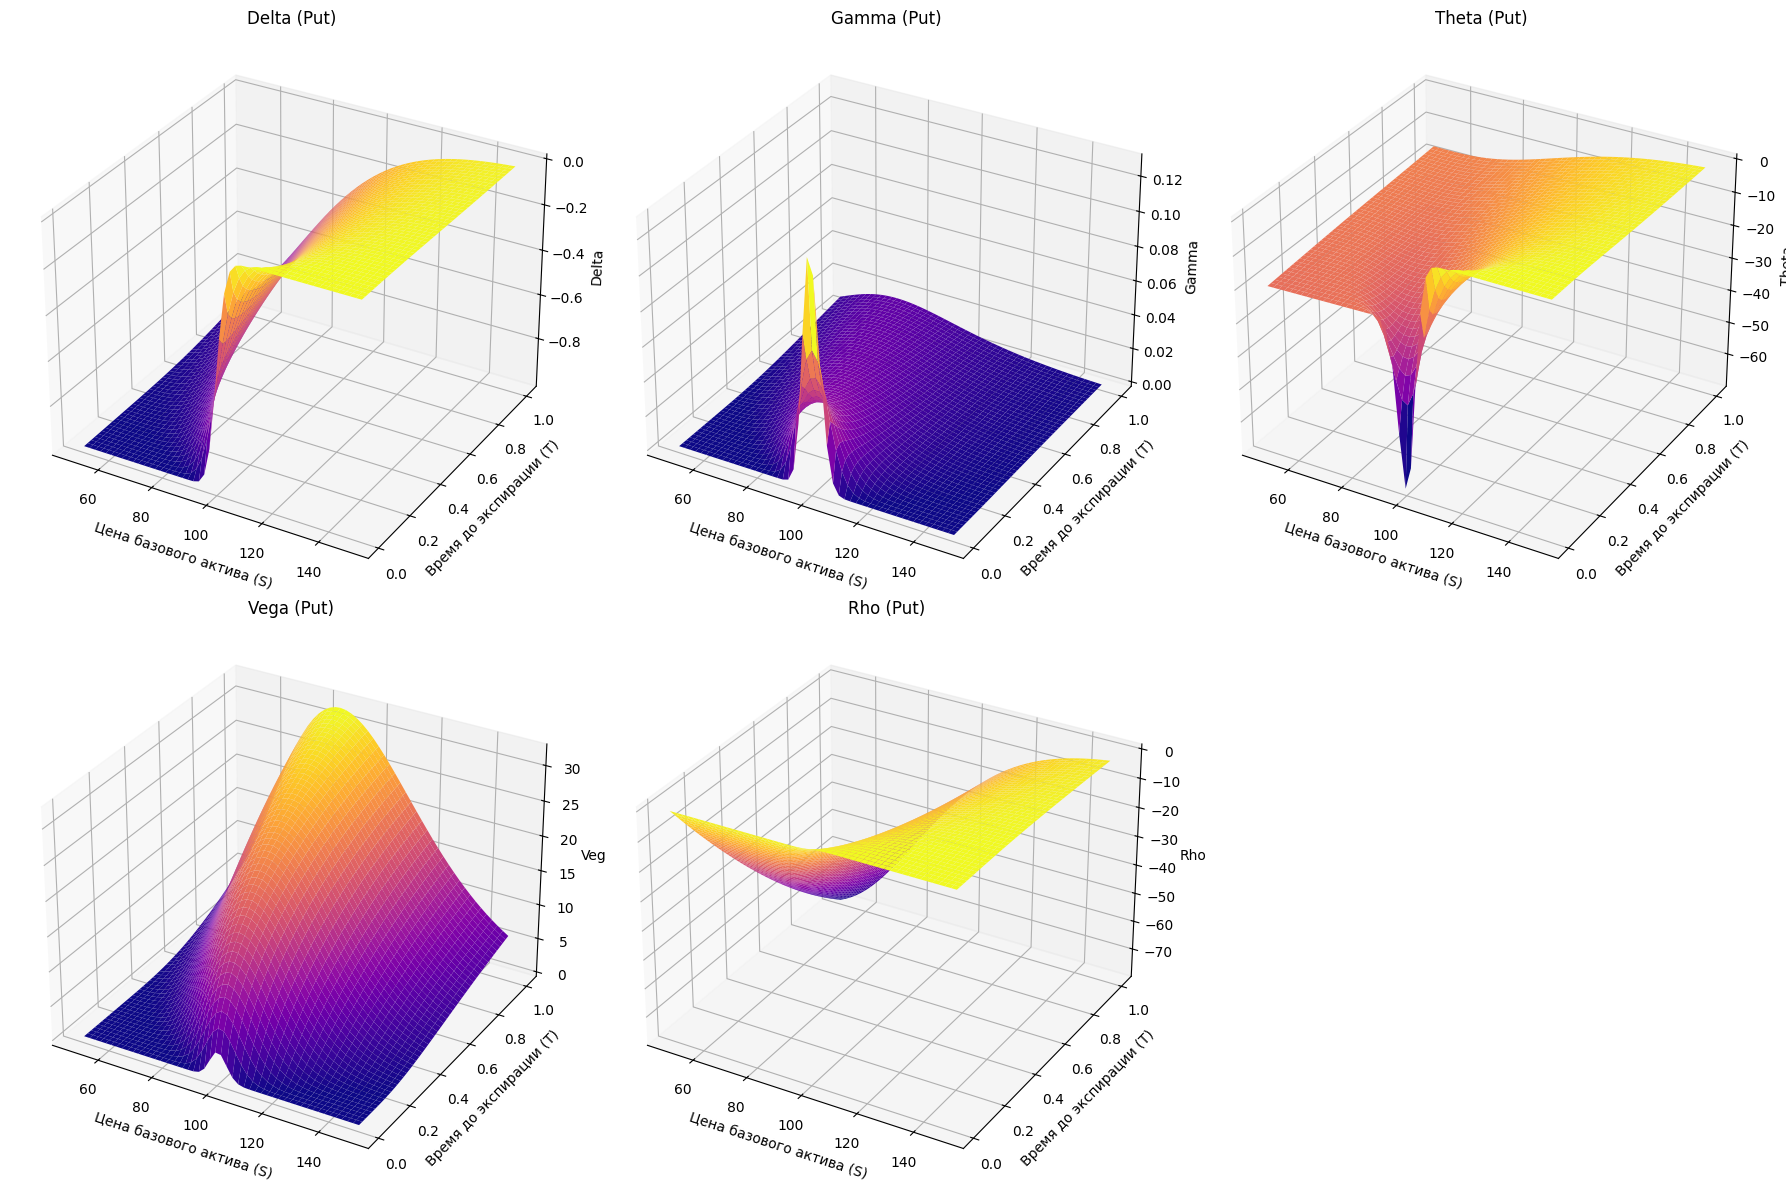

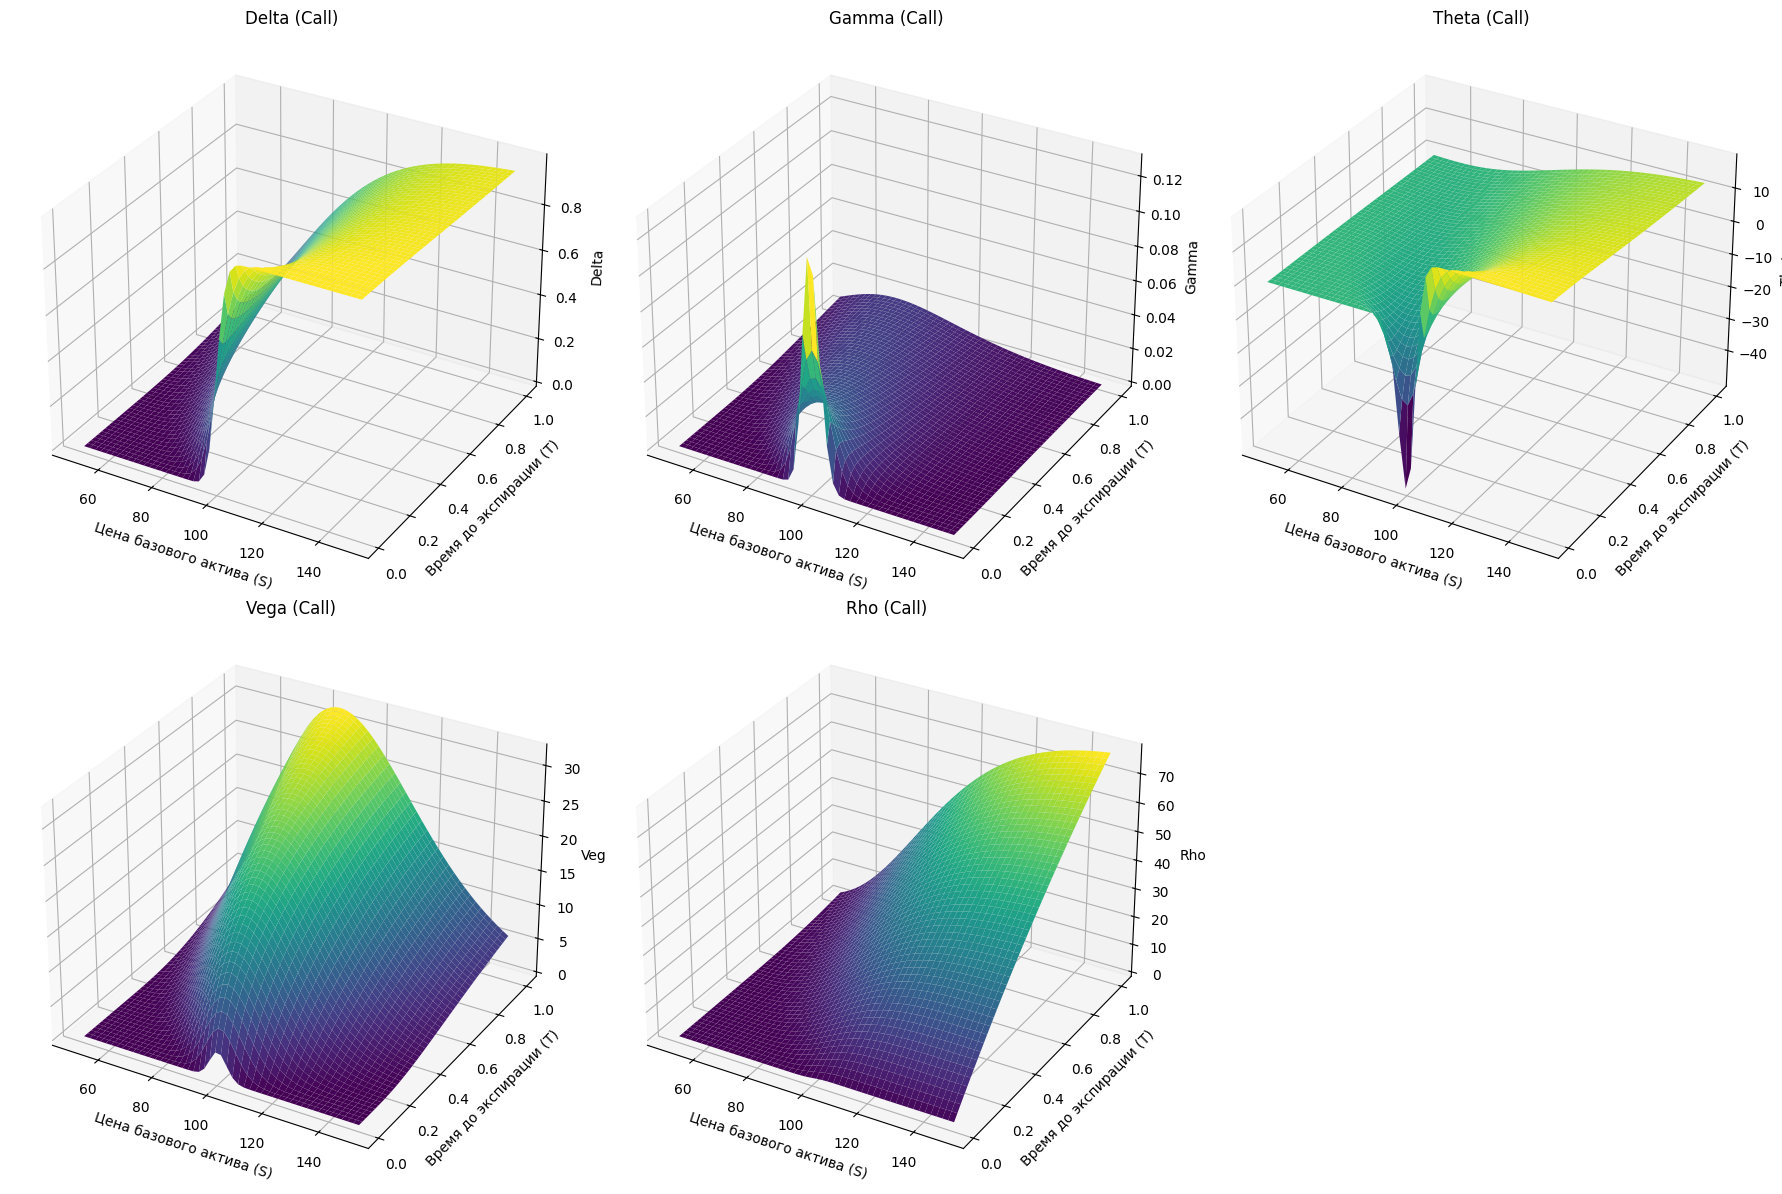

In [ ]:

S_values = np.linspace(50, 150, 50)  
T_values = np.linspace(0.01, 1, 50)  
K = 100                              
sigma = 0.3                          
r = 0.21                             
q = 0.02                             
S_grid, T_grid = np.meshgrid(S_values, T_values)



delta_call = delta(S_grid, K, T_grid, sigma, r, q, option_type="call")
delta_put = delta(S_grid, K, T_grid, sigma, r, q, option_type="put")

gamma_call = gamma(S_grid, K, T_grid, sigma, r, q)
gamma_put = gamma(S_grid, K, T_grid, sigma, r, q)

theta_call = theta(S_grid, K, T_grid, sigma, r, q, option_type="call")
theta_put = theta(S_grid, K, T_grid, sigma, r, q, option_type="put")

vega_call = vega(S_grid, K, T_grid, sigma, r, q)
vega_put = vega(S_grid, K, T_grid, sigma, r, q)

ro_call = rho(S_grid, K, T_grid, sigma, r, q, option_type="call")
ro_put = rho(S_grid, K, T_grid, sigma, r, q, option_type="put")

fig_put = plt.figure(figsize=(18, 12))

# Delta (Put)
ax = fig_put.add_subplot(231, projection='3d')
ax.plot_surface(S_grid, T_grid, delta_put, cmap="plasma")
ax.set_title("Delta (Put)")
ax.set_xlabel("–¶–µ–Ω–∞ –±–∞–∑–æ–≤–æ–≥–æ –∞–∫—Ç–∏–≤–∞ (S)")
ax.set_ylabel("–í—Ä–µ–º—è –¥–æ —ç–∫—Å–ø–∏—Ä–∞—Ü–∏–∏ (T)")
ax.set_zlabel("Delta")

# Gamma (Put)
ax = fig_put.add_subplot(232, projection='3d')
ax.plot_surface(S_grid, T_grid, gamma_put, cmap="plasma")
ax.set_title("Gamma (Put)")
ax.set_xlabel("–¶–µ–Ω–∞ –±–∞–∑–æ–≤–æ–≥–æ –∞–∫—Ç–∏–≤–∞ (S)")
ax.set_ylabel("–í—Ä–µ–º—è –¥–æ —ç–∫—Å–ø–∏—Ä–∞—Ü–∏–∏ (T)")
ax.set_zlabel("Gamma")

# Theta (Put)
ax = fig_put.add_subplot(233, projection='3d')
ax.plot_surface(S_grid, T_grid, theta_put, cmap="plasma")
ax.set_title("Theta (Put)")
ax.set_xlabel("–¶–µ–Ω–∞ –±–∞–∑–æ–≤–æ–≥–æ –∞–∫—Ç–∏–≤–∞ (S)")
ax.set_ylabel("–í—Ä–µ–º—è –¥–æ —ç–∫—Å–ø–∏—Ä–∞—Ü–∏–∏ (T)")
ax.set_zlabel("Theta")

# Vega (Put)
ax = fig_put.add_subplot(234, projection='3d')
ax.plot_surface(S_grid, T_grid, vega_put, cmap="plasma")
ax.set_title("Vega (Put)")
ax.set_xlabel("–¶–µ–Ω–∞ –±–∞–∑–æ–≤–æ–≥–æ –∞–∫—Ç–∏–≤–∞ (S)")
ax.set_ylabel("–í—Ä–µ–º—è –¥–æ —ç–∫—Å–ø–∏—Ä–∞—Ü–∏–∏ (T)")
ax.set_zlabel("Vega")

# Rho (Put)
ax = fig_put.add_subplot(235, projection='3d')
ax.plot_surface(S_grid, T_grid, ro_put, cmap="plasma")
ax.set_title("Rho (Put)")
ax.set_xlabel("–¶–µ–Ω–∞ –±–∞–∑–æ–≤–æ–≥–æ –∞–∫—Ç–∏–≤–∞ (S)")
ax.set_ylabel("–í—Ä–µ–º—è –¥–æ —ç–∫—Å–ø–∏—Ä–∞—Ü–∏–∏ (T)")
ax.set_zlabel("Rho")

plt.tight_layout()
plt.show()


fig_call = plt.figure(figsize=(18, 12))

# Delta (Call)
ax = fig_call.add_subplot(231, projection='3d')
ax.plot_surface(S_grid, T_grid, delta_call, cmap="viridis")
ax.set_title("Delta (Call)")
ax.set_xlabel("–¶–µ–Ω–∞ –±–∞–∑–æ–≤–æ–≥–æ –∞–∫—Ç–∏–≤–∞ (S)")
ax.set_ylabel("–í—Ä–µ–º—è –¥–æ —ç–∫—Å–ø–∏—Ä–∞—Ü–∏–∏ (T)")
ax.set_zlabel("Delta")

# Gamma (Call)
ax = fig_call.add_subplot(232, projection='3d')
ax.plot_surface(S_grid, T_grid, gamma_call, cmap="viridis")
ax.set_title("Gamma (Call)")
ax.set_xlabel("–¶–µ–Ω–∞ –±–∞–∑–æ–≤–æ–≥–æ –∞–∫—Ç–∏–≤–∞ (S)")
ax.set_ylabel("–í—Ä–µ–º—è –¥–æ —ç–∫—Å–ø–∏—Ä–∞—Ü–∏–∏ (T)")
ax.set_zlabel("Gamma")

# Theta (Call)
ax = fig_call.add_subplot(233, projection='3d')
ax.plot_surface(S_grid, T_grid, theta_call, cmap="viridis")
ax.set_title("Theta (Call)")
ax.set_xlabel("–¶–µ–Ω–∞ –±–∞–∑–æ–≤–æ–≥–æ –∞–∫—Ç–∏–≤–∞ (S)")
ax.set_ylabel("–í—Ä–µ–º—è –¥–æ —ç–∫—Å–ø–∏—Ä–∞—Ü–∏–∏ (T)")
ax.set_zlabel("Theta")

# Vega (Call)
ax = fig_call.add_subplot(234, projection='3d')
ax.plot_surface(S_grid, T_grid, vega_call, cmap="viridis")
ax.set_title("Vega (Call)")
ax.set_xlabel("–¶–µ–Ω–∞ –±–∞–∑–æ–≤–æ–≥–æ –∞–∫—Ç–∏–≤–∞ (S)")
ax.set_ylabel("–í—Ä–µ–º—è –¥–æ —ç–∫—Å–ø–∏—Ä–∞—Ü–∏–∏ (T)")
ax.set_zlabel("Vega")

# Rho (Call)
ax = fig_call.add_subplot(235, projection='3d')
ax.plot_surface(S_grid, T_grid, ro_call, cmap="viridis")
ax.set_title("Rho (Call)")
ax.set_xlabel("–¶–µ–Ω–∞ –±–∞–∑–æ–≤–æ–≥–æ –∞–∫—Ç–∏–≤–∞ (S)")
ax.set_ylabel("–í—Ä–µ–º—è –¥–æ —ç–∫—Å–ø–∏—Ä–∞—Ü–∏–∏ (T)")
ax.set_zlabel("Rho")

plt.tight_layout()
plt.show()

* Delta (Call Option):

    - –ü—Ä–∏ —É–≤–µ–ª–∏—á–µ–Ω–∏–∏ —Å—Ç–æ–∏–º–æ—Å—Ç–∏ –±–∞–∑–æ–≤–æ–≥–æ –∞–∫—Ç–∏–≤–∞ 
        –¥–µ–ª—å—Ç–∞ –ø—Ä–∏–±–ª–∏–∂–∞–µ—Ç—Å—è –∫ 


    - –ü—Ä–∏ —É–º–µ–Ω—å—à–µ–Ω–∏–∏ –≤—Ä–µ–º–µ–Ω–∏ –¥–æ —ç–∫—Å–ø–∏—Ä–∞—Ü–∏–∏ $T‚Üí0$, —Ñ–æ—Ä–º–∞ –∫—Ä–∏–≤–æ–π —Å—Ç–∞–Ω–æ–≤–∏—Ç—Å—è –±–æ–ª–µ–µ –≤—ã—Ä–∞–∂–µ–Ω–Ω–æ–π.

* Delta (Put Option):

    - –ü—Ä–∏ —É–≤–µ–ª–∏—á–µ–Ω–∏–∏ —Å—Ç–æ–∏–º–æ—Å—Ç–∏ –±–∞–∑–æ–≤–æ–≥–æ –∞–∫—Ç–∏–≤–∞ 
     –¥–µ–ª—å—Ç–∞ –ø—Ä–∏–±–ª–∏–∂–∞–µ—Ç—Å—è –∫ 0

    - –ü—Ä–∏ —É–º–µ–Ω—å—à–µ–Ω–∏–∏ –≤—Ä–µ–º–µ–Ω–∏ –¥–æ —ç–∫—Å–ø–∏—Ä–∞—Ü–∏–∏ $ùëá‚Üí0$, –¥–µ–ª—å—Ç–∞ –æ–ø—É—Å–∫–∞–µ—Ç—Å—è –Ω–∏–∂–µ, –ø–æ–∫–∞–∑—ã–≤–∞—è –º–µ–Ω—å—à—É—é –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –∏—Å–ø–æ–ª–Ω–µ–Ω–∏—è –æ–ø—Ü–∏–æ–Ω–∞.


* –û—Å–Ω–æ–≤–Ω—ã–µ –≤—ã–≤–æ–¥—ã:
    - –ß—É–≤—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å —Å—Ç–æ–∏–º–æ—Å—Ç–∏ –æ–ø—Ü–∏–æ–Ω–∞ –∫ –¥–≤–∏–∂–µ–Ω–∏—é –±–∞–∑–æ–≤–æ–≥–æ –∞–∫—Ç–∏–≤–∞ $ùëÜ$ —É–≤–µ–ª–∏—á–∏–≤–∞–µ—Ç—Å—è –±–ª–∏–∂–µ –∫ —ç–∫—Å–ø–∏—Ä–∞—Ü–∏–∏.
    - –ü–æ–≤–µ–¥–µ–Ω–∏–µ –¥–µ–ª—å—Ç—ã —Ä–µ–∑–∫–æ –º–µ–Ω—è–µ—Ç—Å—è –ø—Ä–∏ –ø–æ–¥—Ö–æ–¥–µ —Ü–µ–Ω—ã –±–∞–∑–æ–≤–æ–≥–æ –∞–∫—Ç–∏–≤–∞ $ùëÜ$ –∫ —Å—Ç—Ä–∞–π–∫—É $ùêæ$
    - –í—Ä–µ–º–µ–Ω–Ω–æ–π —Ñ–∞–∫—Ç–æ—Ä $ùëá$ –∏–≥—Ä–∞–µ—Ç –∫–ª—é—á–µ–≤—É—é —Ä–æ–ª—å –≤ –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–∏ —Ñ–æ—Ä–º—ã –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –¥–µ–ª—å—Ç—ã.

# –û–ø—Ü–∏–æ–Ω–Ω–∞—è —Å—Ç—Ä–∞—Ç–µ–≥–∏—è

## –ó–∞–¥–∞—á–∞ (–ø–æ –≤–∞—Ä–∏–∞–Ω—Ç–∞–º)

–ó–∞–¥–∞—á–∞. –° –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ –¥–æ—Å–æ–∫ –æ–ø—Ü–∏–æ–Ω–æ–≤ [Nasdaq](https://www.nasdaq.com/market-activity/stocks/aapl/option-chain) –∏–ª–∏ [MOEX](https://www.moex.com/ru/derivatives/optionsdesk.aspx) –≤—ã–±–µ—Ä–∏—Ç–µ –ª–∏–∫–≤–∏–¥–Ω—ã–π –∞–∫—Ç–∏–≤ –∏ —Ä–µ–∞–ª–∏–∑—É–µ–π—Ç–µ –¥–≤–µ [–æ–ø—Ü–∏–æ–Ω–Ω—ã—Ö —Å—Ç—Ä–∞—Ç–µ–≥–∏–π](https://www.option.ru/glossary/strategy),
$i$ –∏ $i+12$, –≥–¥–µ $i$ -- –≤–∞—à–∞ —Ñ–∞–º–∏–ª–∏—è –ø–æ –∞–ª—Ñ–∞–≤–∏—Ç—É:

1.   –ü–æ–∫—É–ø–∫–∞ –æ–ø—Ü–∏–æ–Ω–∞ –∫–æ–ª–ª. Long Call
1. –ü—Ä–æ–¥–∞–∂–∞ –æ–ø—Ü–∏–æ–Ω–∞ –∫–æ–ª–ª. Short Call
1. –ü–æ–∫—É–ø–∫–∞ –æ–ø—Ü–∏–æ–Ω–∞ –ø—É—Ç. Long Put
1. –ü—Ä–æ–¥–∞–∂–∞ –æ–ø—Ü–∏–æ–Ω–∞ –ø—É—Ç. Short Put
1. –ë—ã—á–∏–π –∫–æ–ª–ª —Å–ø—Ä—ç–¥. Bull Call Spread
1. –ë—ã—á–∏–π –ø—É—Ç —Å–ø—Ä—ç–¥. Bull Put Spread
1. –ú–µ–¥–≤–µ–∂–∏–π –∫–æ–ª–ª —Å–ø—Ä—ç–¥. Bear Call Spread
1. –ú–µ–¥–≤–µ–∂–∏–π –ø—É—Ç —Å–ø—Ä—ç–¥. Bear Put Spread
1. –ü–æ–∫—É–ø–∫–∞ –±–∞–±–æ—á–∫–∏. Long Butterfly
1. –ü—Ä–æ–¥–∞–∂–∞ –±–∞–±–æ—á–∫–∏. Short Butterfly
1. –ü–æ–∫—É–ø–∫–∞ –∫–æ–Ω–¥–æ—Ä–∞. Long Condor
1. –ü—Ä–æ–¥–∞–∂–∞ –∫–æ–Ω–¥–æ—Ä–∞. Short Condor
1. –ü–æ–∫—É–ø–∫–∞ —Å—Ç—Ä—ç–¥–¥–ª–∞. Long Straddle
1. –ü—Ä–æ–¥–∞–∂–∞ —Å—Ç—Ä—ç–¥–¥–ª–∞. Short Straddle
1. –ü–æ–∫—É–ø–∫–∞ —Å—Ç—Ä—ç–Ω–≥–ª–∞. Long Strangle
1. –ü—Ä–æ–¥–∞–∂–∞ —Å—Ç—Ä—ç–Ω–≥–ª–∞. Short Strangle
1. –ü—Ä–æ–ø–æ—Ä—Ü–∏–æ–Ω–∞–ª—å–Ω—ã–π –∫–æ–ª–ª —Å–ø—Ä—ç–¥. Call Ratio Spread
1. –ü—Ä–æ–ø–æ—Ä—Ü–∏–æ–Ω–∞–ª—å–Ω—ã–π –ø—É—Ç —Å–ø—Ä—ç–¥. Put Ratio Spread
1. –ü—Ä–æ–ø–æ—Ä—Ü–∏–æ–Ω–∞–ª—å–Ω—ã–π –æ–±—Ä–∞—Ç–Ω—ã–π –∫–æ–ª–ª —Å–ø—Ä—ç–¥. Call Ratio Backspread
1. –ü—Ä–æ–ø–æ—Ä—Ü–∏–æ–Ω–∞–ª—å–Ω—ã–π –æ–±—Ä–∞—Ç–Ω—ã–π –ø—É—Ç —Å–ø—Ä—ç–¥. Put Ratio Backspread
1. –°–∏–Ω—Ç–µ—Ç–∏—á–µ—Å–∫–∏–π –¥–ª–∏–Ω–Ω—ã–π —Ñ—å—é—á–µ—Ä—Å. Synthetic Long Futures
1. –°–∏–Ω—Ç–µ—Ç–∏—á–µ—Å–∫–∏–π –∫–æ—Ä–æ—Ç–∫–∏–π —Ñ—å—é—á–µ—Ä—Å. Synthetic Short Futures
1. –°—Ç—Ä—ç–ø. Strap
1. –°—Ç—Ä–∏–ø. Strip
1. –û–±—Ä–∞—Ç–Ω—ã–π –±—ã—á–∏–π —Å–ø—Ä—ç–¥. Bull Backspread
1. –û–±—Ä–∞—Ç–Ω—ã–π –º–µ–¥–≤–µ–∂–∏–π —Å–ø—Ä—ç–¥. Bear Backspread

–ü—Ä–æ–∞–Ω–∞–ª–∏–∑–∏—Ä—É–π—Ç–µ –∫–∞–∫ –≤–ª–∏—è–µ—Ç —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ  —Å–ø–æ—Ç —Ü–µ–Ω—ã –±–∞–∑–æ–≤–æ–≥–æ –∞–∫—Ç–∏–≤–∞ $S$ –∏ —Ü–µ–Ω—ã —Å—Ç—Ä–∞–π–∫ $K$ –¥–ª—è

–æ–ø—Ü–∏–æ–Ω–∞ call:

*   $S > K$ -- –≤ –¥–µ–Ω—å–≥–∞—Ö (in the money),   
*   $S = K$ -- –æ–∫–æ–ª–æ –¥–µ–Ω–µ–≥ (at the money),
*   $S < K$ --  –≤–Ω–µ –¥–µ–Ω–µ–≥ (out of the money) –∏

–æ–ø—Ü–∏–æ–Ω–∞ put:
*   $S < K$ -- –≤ –¥–µ–Ω—å–≥–∞—Ö (in the money),
*   $S = K$ -- –æ–∫–æ–ª–æ –¥–µ–Ω–µ–≥ (at the money),  
*   $S > K$ -- –≤–Ω–µ –¥–µ–Ω–µ–≥ (out of the money).

–û–ø—Ä–µ–¥–µ–ª–∏—Ç–µ –º–∞–∫—Å–∏–º–∞–ª—å–Ω—É—é –ø—Ä–∏–±—ã–ª—å –∏ –ø–æ—Ç–µ—Ä–∏, –µ—Å–ª–∏ —Ü–µ–Ω–∞ –±–∞–∑–æ–≤–æ–≥–æ –∞–∫—Ç–∏–≤–∞ –º–æ–∂–µ—Ç –≤—ã—Ä–∞—Å—Ç–∏ –≤ –¥–≤–∞ —Ä–∞–∑–∞ (–º–µ–Ω—å—à–µ –Ω—É–ª—è –Ω–µ –º–æ–∂–µ—Ç –±—ã—Ç—å). –û–ø—Ä–µ–¥–µ–ª–∏—Ç–µ –∏–Ω—Ç–µ—Ä–≤–∞–ª –±–µ–∑—É–±—ã—Ç–æ—á–Ω–æ—Å—Ç–∏ —Å—Ç—Ä–∞—Ç–µ–≥–∏–∏ —Å —É—á–µ—Ç–æ–º –ø—Ä–µ–º–∏–∏.

–ü–æ—Å—Ç—Ä–æ–π—Ç–µ –≥—Ä–∞—Ñ–∏–∫ —Ñ—É–Ω–∫—Ü–∏–∏ –≤—ã–ø–ª–∞—Ç –¥–ª—è –∫–∞–∂–¥–æ–π –æ–ø—Ü–∏–æ–Ω–Ω–æ–π —Å—Ç—Ä–∞—Ç–µ–≥–∏–∏.

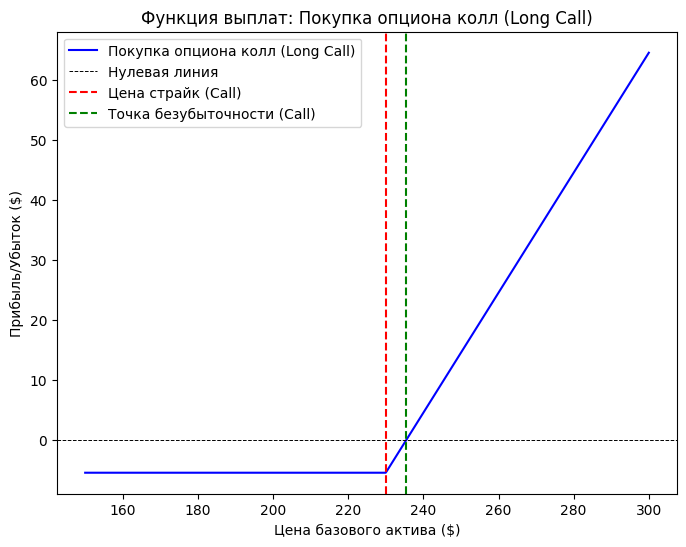

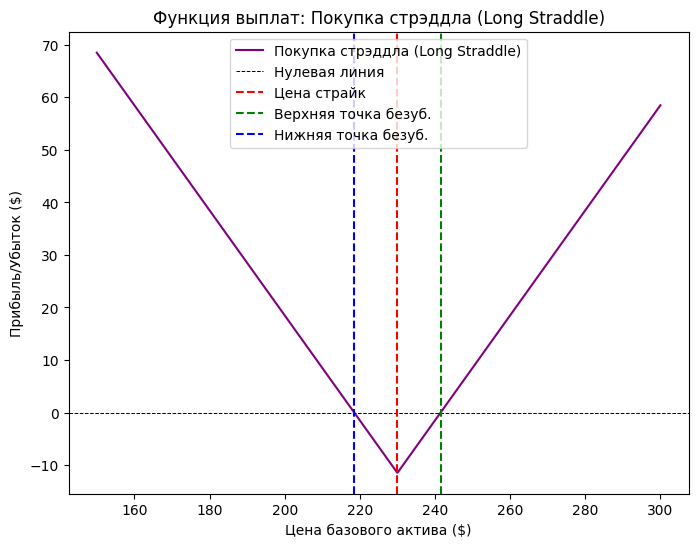

–î–∞–Ω–Ω—ã–µ –≤–∑—è—Ç—ã —Å –¥–æ—Å–∫–∏ –æ–ø—Ü–∏–æ–Ω–æ–≤ NASDAQ –¥–ª—è –∞–∫—Ü–∏–π Apple Inc. (AAPL):
–ò—Å—Ç–æ—á–Ω–∏–∫: https://www.nasdaq.com/market-activity/stocks/aapl/option-chain
–ü–∞—Ä–∞–º–µ—Ç—Ä—ã –æ–ø—Ü–∏–æ–Ω–æ–≤:
  - –¢–µ–∫—É—â–∞—è —Ü–µ–Ω–∞ –±–∞–∑–æ–≤–æ–≥–æ –∞–∫—Ç–∏–≤–∞: 229.0$
  - –û–ø—Ü–∏–æ–Ω –∫–æ–ª–ª: —Å—Ç—Ä–∞–π–∫ 230$, –ø—Ä–µ–º–∏—è 5.5$
  - –û–ø—Ü–∏–æ–Ω –ø—É—Ç: —Å—Ç—Ä–∞–π–∫ 230$, –ø—Ä–µ–º–∏—è 6.0$


In [74]:
# 1, 13 –º–æ–∏

# –ò—Å—Ö–æ–¥–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ: –≤–∑—è—Ç—ã –∏–∑ –¥–æ—Å–∫–∏ –æ–ø—Ü–∏–æ–Ω–æ–≤ NASDAQ –Ω–∞ –∞–∫—Ü–∏–∏ Apple (AAPL)
# –ò—Å—Ç–æ—á–Ω–∏–∫: https://www.nasdaq.com/market-activity/stocks/aapl/option-chain


spot_price = 229.00  


strike_price_call = 230  
premium_call = 5.50      

strike_price_put = 230   
premium_put = 6.00       


S = np.linspace(150, 300, 500)  


payoff_call = np.maximum(0, S - strike_price_call) - premium_call


payoff_straddle = (
    np.maximum(0, S - strike_price_call) + np.maximum(0, strike_price_put - S)
    - (premium_call + premium_put)
)

break_even_call = strike_price_call + premium_call
break_even_straddle_upper = strike_price_call + (premium_call + premium_put)
break_even_straddle_lower = strike_price_call - (premium_call + premium_put)


plt.figure(figsize=(8, 6))
plt.plot(S, payoff_call, label='–ü–æ–∫—É–ø–∫–∞ –æ–ø—Ü–∏–æ–Ω–∞ –∫–æ–ª–ª (Long Call)', color='blue')
plt.axhline(0, color='black', linewidth=0.7, linestyle='--', label='–ù—É–ª–µ–≤–∞—è –ª–∏–Ω–∏—è')
plt.axvline(strike_price_call, color='red', linestyle='--', label='–¶–µ–Ω–∞ —Å—Ç—Ä–∞–π–∫ (Call)')
plt.axvline(break_even_call, color='green', linestyle='--', label='–¢–æ—á–∫–∞ –±–µ–∑—É–±—ã—Ç–æ—á–Ω–æ—Å—Ç–∏ (Call)')
plt.title('–§—É–Ω–∫—Ü–∏—è –≤—ã–ø–ª–∞—Ç: –ü–æ–∫—É–ø–∫–∞ –æ–ø—Ü–∏–æ–Ω–∞ –∫–æ–ª–ª (Long Call)')
plt.xlabel('–¶–µ–Ω–∞ –±–∞–∑–æ–≤–æ–≥–æ –∞–∫—Ç–∏–≤–∞ ($)')
plt.ylabel('–ü—Ä–∏–±—ã–ª—å/–£–±—ã—Ç–æ–∫ ($)')
plt.legend()
plt.show()


plt.figure(figsize=(8, 6))
plt.plot(S, payoff_straddle, label='–ü–æ–∫—É–ø–∫–∞ —Å—Ç—Ä—ç–¥–¥–ª–∞ (Long Straddle)', color='purple')
plt.axhline(0, color='black', linewidth=0.7, linestyle='--', label='–ù—É–ª–µ–≤–∞—è –ª–∏–Ω–∏—è')
plt.axvline(strike_price_call, color='red', linestyle='--', label='–¶–µ–Ω–∞ —Å—Ç—Ä–∞–π–∫')
plt.axvline(break_even_straddle_upper, color='green', linestyle='--', label='–í–µ—Ä—Ö–Ω—è—è —Ç–æ—á–∫–∞ –±–µ–∑—É–±.')
plt.axvline(break_even_straddle_lower, color='blue', linestyle='--', label='–ù–∏–∂–Ω—è—è —Ç–æ—á–∫–∞ –±–µ–∑—É–±.')
plt.title('–§—É–Ω–∫—Ü–∏—è –≤—ã–ø–ª–∞—Ç: –ü–æ–∫—É–ø–∫–∞ —Å—Ç—Ä—ç–¥–¥–ª–∞ (Long Straddle)')
plt.xlabel('–¶–µ–Ω–∞ –±–∞–∑–æ–≤–æ–≥–æ –∞–∫—Ç–∏–≤–∞ ($)')
plt.ylabel('–ü—Ä–∏–±—ã–ª—å/–£–±—ã—Ç–æ–∫ ($)')
plt.legend()
plt.show()

print("–î–∞–Ω–Ω—ã–µ –≤–∑—è—Ç—ã —Å –¥–æ—Å–∫–∏ –æ–ø—Ü–∏–æ–Ω–æ–≤ NASDAQ –¥–ª—è –∞–∫—Ü–∏–π Apple Inc. (AAPL):")
print("–ò—Å—Ç–æ—á–Ω–∏–∫: https://www.nasdaq.com/market-activity/stocks/aapl/option-chain")
print("–ü–∞—Ä–∞–º–µ—Ç—Ä—ã –æ–ø—Ü–∏–æ–Ω–æ–≤:")
print(f"  - –¢–µ–∫—É—â–∞—è —Ü–µ–Ω–∞ –±–∞–∑–æ–≤–æ–≥–æ –∞–∫—Ç–∏–≤–∞: {spot_price}$")
print(f"  - –û–ø—Ü–∏–æ–Ω –∫–æ–ª–ª: —Å—Ç—Ä–∞–π–∫ {strike_price_call}$, –ø—Ä–µ–º–∏—è {premium_call}$")
print(f"  - –û–ø—Ü–∏–æ–Ω –ø—É—Ç: —Å—Ç—Ä–∞–π–∫ {strike_price_put}$, –ø—Ä–µ–º–∏—è {premium_put}$")



## –ó–∞–¥–∞—á–∞ (–æ–ø—Ç–∏–º–∞–ª—å–Ω—ã–π –Ω–∞–±–æ—Ä)

–ó–∞–¥–∞—á–∞. –° –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ –¥–æ—Å–∫–∏ –æ–ø—Ü–∏–æ–Ω–æ–≤ [Nasdaq](https://www.nasdaq.com/market-activity/stocks/aapl/option-chain) –Ω–∞–π–¥–∏—Ç–µ –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã–π –Ω–∞–±–æ—Ä –æ–ø—Ü–∏–æ–Ω–Ω—ã—Ö –∫–æ–Ω—Ç—Ä–∞–∫—Ç–æ–≤ $$
X=\{X_c, X_p\},$$
–≥–¥–µ
$$
X_c=\{x_i^c \in
\mathbb{Z}: L\le x_i^c \le U, i \in I\},
$$
$$
X_p=\{x_i^p
\in \mathbb{Z}: L \le x_i^p \le U, i \in I\},
$$
–∑–¥–µ—Å—å
$x_i^c$, $x_i^p>0$ -- –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ–ø—Ü–∏–æ–Ω–æ–≤ –∫–æ–ª–ª –∏ –ø—É—Ç –¥–ª—è –ø–æ–∫—É–ø–∫–∏, $x_i^c$, $x_i^p<0$ -- –¥–ª—è –ø—Ä–æ–¥–∞–∂–∏. –ï—Å–ª–∏
$x_i^c=0$ –∏–ª–∏ $x_i^p=0$, —Ç–æ $i$-—ã–π –∫–æ–Ω—Ç—Ä–∞–∫—Ç
–Ω–µ –≤—Ö–æ–¥–∏—Ç –≤ –ø–æ—Ä—Ç—Ñ–µ–ª—å, $L<0$ –∏ $U>0$ -- –Ω–∏–∂–Ω—è—è –∏ –≤–µ—Ä—Ö–Ω—è—è –≥—Ä–∞–Ω–∏—Ü—ã –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –∫–æ–Ω—Ç—Ä–∞–∫—Ç–æ–≤ –≤ –ø–æ—Ä—Ç—Ñ–µ–ª–µ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–µ–Ω–Ω–æ,
$I=\{1,2, \ldots, n\}$ -- –Ω–∞–±–æ—Ä –∏–Ω–¥–µ–∫—Å–æ–≤.

–ü—Ä–∏ —Ä–∞–∑—Ä–∞–±–æ—Ç–∫–µ —Å—Ç—Ä–∞—Ç–µ–≥–∏–∏ –ø—Ä–∏–¥–µ—Ä–∂–∏–≤–∞—Ç—å—Å—è —Å–ª–µ–¥—É—é—â–∏—Ö –ø—Ä–µ–ø–æ–ª–æ–∂–µ–Ω–∏–π
*   –ø–æ–∫—É–ø–∫–∏ –∏ –ø—Ä–æ–¥–∞–∂–∏ –æ–ø—Ü–∏–æ–Ω–æ–≤ –º–æ–∂–Ω–æ –æ—Å—É—â–µ—Å—Ç–≤–ª—è—Ç—å –ø–æ ask- –∏ bid-—Ü–µ–Ω–∞–º,
*   –º–æ–∂–Ω–æ –∑–∞–Ω–∏–º–∞—Ç—å –∫–æ—Ä–æ—Ç–∫–∏–µ –∏ –¥–ª–∏–Ω–Ω—ã–µ –ø–æ–∑–∏—Ü–∏–∏ —Å —É—á–µ—Ç–æ–º –ª–∏–∫–≤–∏–¥–Ω–æ—Å—Ç–∏ –∫–æ–Ω—Ç—Ä–∞–∫—Ç–∞,
*  —Å—Ç—Ä–∞—Ç–µ–≥–∏—è –¥–æ–ª–∂–Ω–∞ –∏–º–µ—Ç—å –∑–∞—â–∏—Ç—É –æ—Ç –ø–∞–¥–µ–Ω–∏—è –∏ —Ä–æ—Å—Ç–∞ —Ü–µ–Ω —Å—Ç—Ä–∞–π–∫ –Ω–∞ $x$\% –æ—Ç —Å—Ç–æ–∏–º–æ—Å—Ç–∏ –±–∞–∑–æ–≤–æ–≥–æ –∞–∫—Ç–∏–≤–∞ –≤ –º–æ–º–µ–Ω—Ç –≤—Ä–µ–º–µ–Ω–∏ $T$,
*  –º–∞–∫—Å–∏–º–∞–ª—å–Ω—ã–π —É–±—ã—Ç–æ–∫ —Å—Ç—Ä–∞—Ç–µ–≥–∏–∏ –æ–≥—Ä–∞–Ω–∏—á–µ–Ω –≤–µ–ª–∏—á–∏–Ω–æ–π $\mathcal{L}$, —Ä–∞–≤–Ω–æ–π $y$% –æ—Ç —Å—Ç–æ–∏–º–æ—Å—Ç–∏ –±–∞–∑–æ–≤–æ–≥–æ –∞–∫—Ç–∏–≤–∞ –≤ –º–æ–º–µ–Ω—Ç –≤—Ä–µ–º–µ–Ω–∏ $t=0$
*  —Å—Ç—Ä–∞—Ç–µ–≥–∏—è –∏–º–µ–µ—Ç –Ω–∞—á–∞–ª—å–Ω—É—é —Å—Ç–æ–∏–º–æ—Å—Ç—å $C(t,X)$, —Ä–∞–≤–Ω—É—é $w$ —É—Å–ª–æ–≤–Ω—ã—Ö –µ–¥–∏–Ω–∏—Ü –∫–∞–ø–∏—Ç–∞–ª–∞.

https://arxiv.org/pdf/1707.02087

In [ ]:
from scipy.optimize import linprog


S0 = 229  
x_pct = 0.1
y_pct = 0.05  
w = 10000  

L = -5  
U = 5   

data = {
    'Strike': [220, 225, 230, 235, 240],
    'Call_Ask': [6.0, 5.5, 5.0, 4.5, 4.0],
    'Call_Bid': [5.5, 5.0, 4.5, 4.0, 3.5],
    'Put_Ask': [6.5, 6.0, 5.5, 5.0, 4.5],
    'Put_Bid': [6.0, 5.5, 5.0, 4.5, 4.0]
}
df = pd.DataFrame(data)


c = np.concatenate([df['Call_Ask'], df['Put_Ask']])  


n = len(df)
A_eq = np.zeros((1, 2 * n))  
b_eq = [0]  

A_ub = np.vstack([
    np.concatenate([df['Call_Ask'], df['Put_Ask']]),  
    np.concatenate([df['Call_Bid'], df['Put_Bid']])   
])
b_ub = [w, y_pct * S0]  # –£—Å–ª–æ–≤–∏—è –Ω–∞ –∫–∞–ø–∏—Ç–∞–ª –∏ —É–±—ã—Ç–æ–∫


bounds = [(L, U)] * (2 * n)


res = linprog(c, A_ub=A_ub, b_ub=b_ub, A_eq=A_eq, b_eq=b_eq, bounds=bounds, method='highs')


x_opt = res.x
portfolio_cost = np.dot(c, x_opt)
print(f"–û–ø—Ç–∏–º–∞–ª—å–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ–ø—Ü–∏–æ–Ω–æ–≤: {x_opt}")
print(f"–°—Ç–æ–∏–º–æ—Å—Ç—å –ø–æ—Ä—Ç—Ñ–µ–ª—è: {portfolio_cost}")


–û–ø—Ç–∏–º–∞–ª—å–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ–ø—Ü–∏–æ–Ω–æ–≤: [-5. -5. -5. -5. -5. -5. -5. -5. -5. -5.]
–°—Ç–æ–∏–º–æ—Å—Ç—å –ø–æ—Ä—Ç—Ñ–µ–ª—è: -262.5
